# Pro2	Employee Attrition Prediction_ML

## Import Packages

In [53]:
import numpy as np                                        # Numpy to carry out mathematical calculations
import pandas as pd                                       # Pandas to create and manipulate dataframe
import matplotlib.pyplot as plt                           # Matplotlib to plot the data points onto a graph
import seaborn as sns                                     # Seaborn to carry out statistical graphical functions 
import sklearn
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

## [1] Loading Dataset

In [57]:
df=pd.read_csv('J:\Courses\Top Mentor\Class Notes\Day 36 (Sept 17) - Tableau and Major projects\Project files\Project2 (Employee Attrition Prediction) - ML\Pro2_File\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()                                        # To get top 5 rows from table

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## [2] Feature Engineering (Data Cleaning)

In [58]:
# Finding information about data using info in pandas
df.info()                 # shows datatype of column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 2.1 Handling Null Values

In [59]:
# Checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [60]:
# There are no null values so no need to handle, we can proceed further

### 2.2 Checking Normal Distribution (KDE) for numerical data

In [61]:
df_num = df.select_dtypes(exclude='object')
df_num.shape

(1470, 26)

In [62]:
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

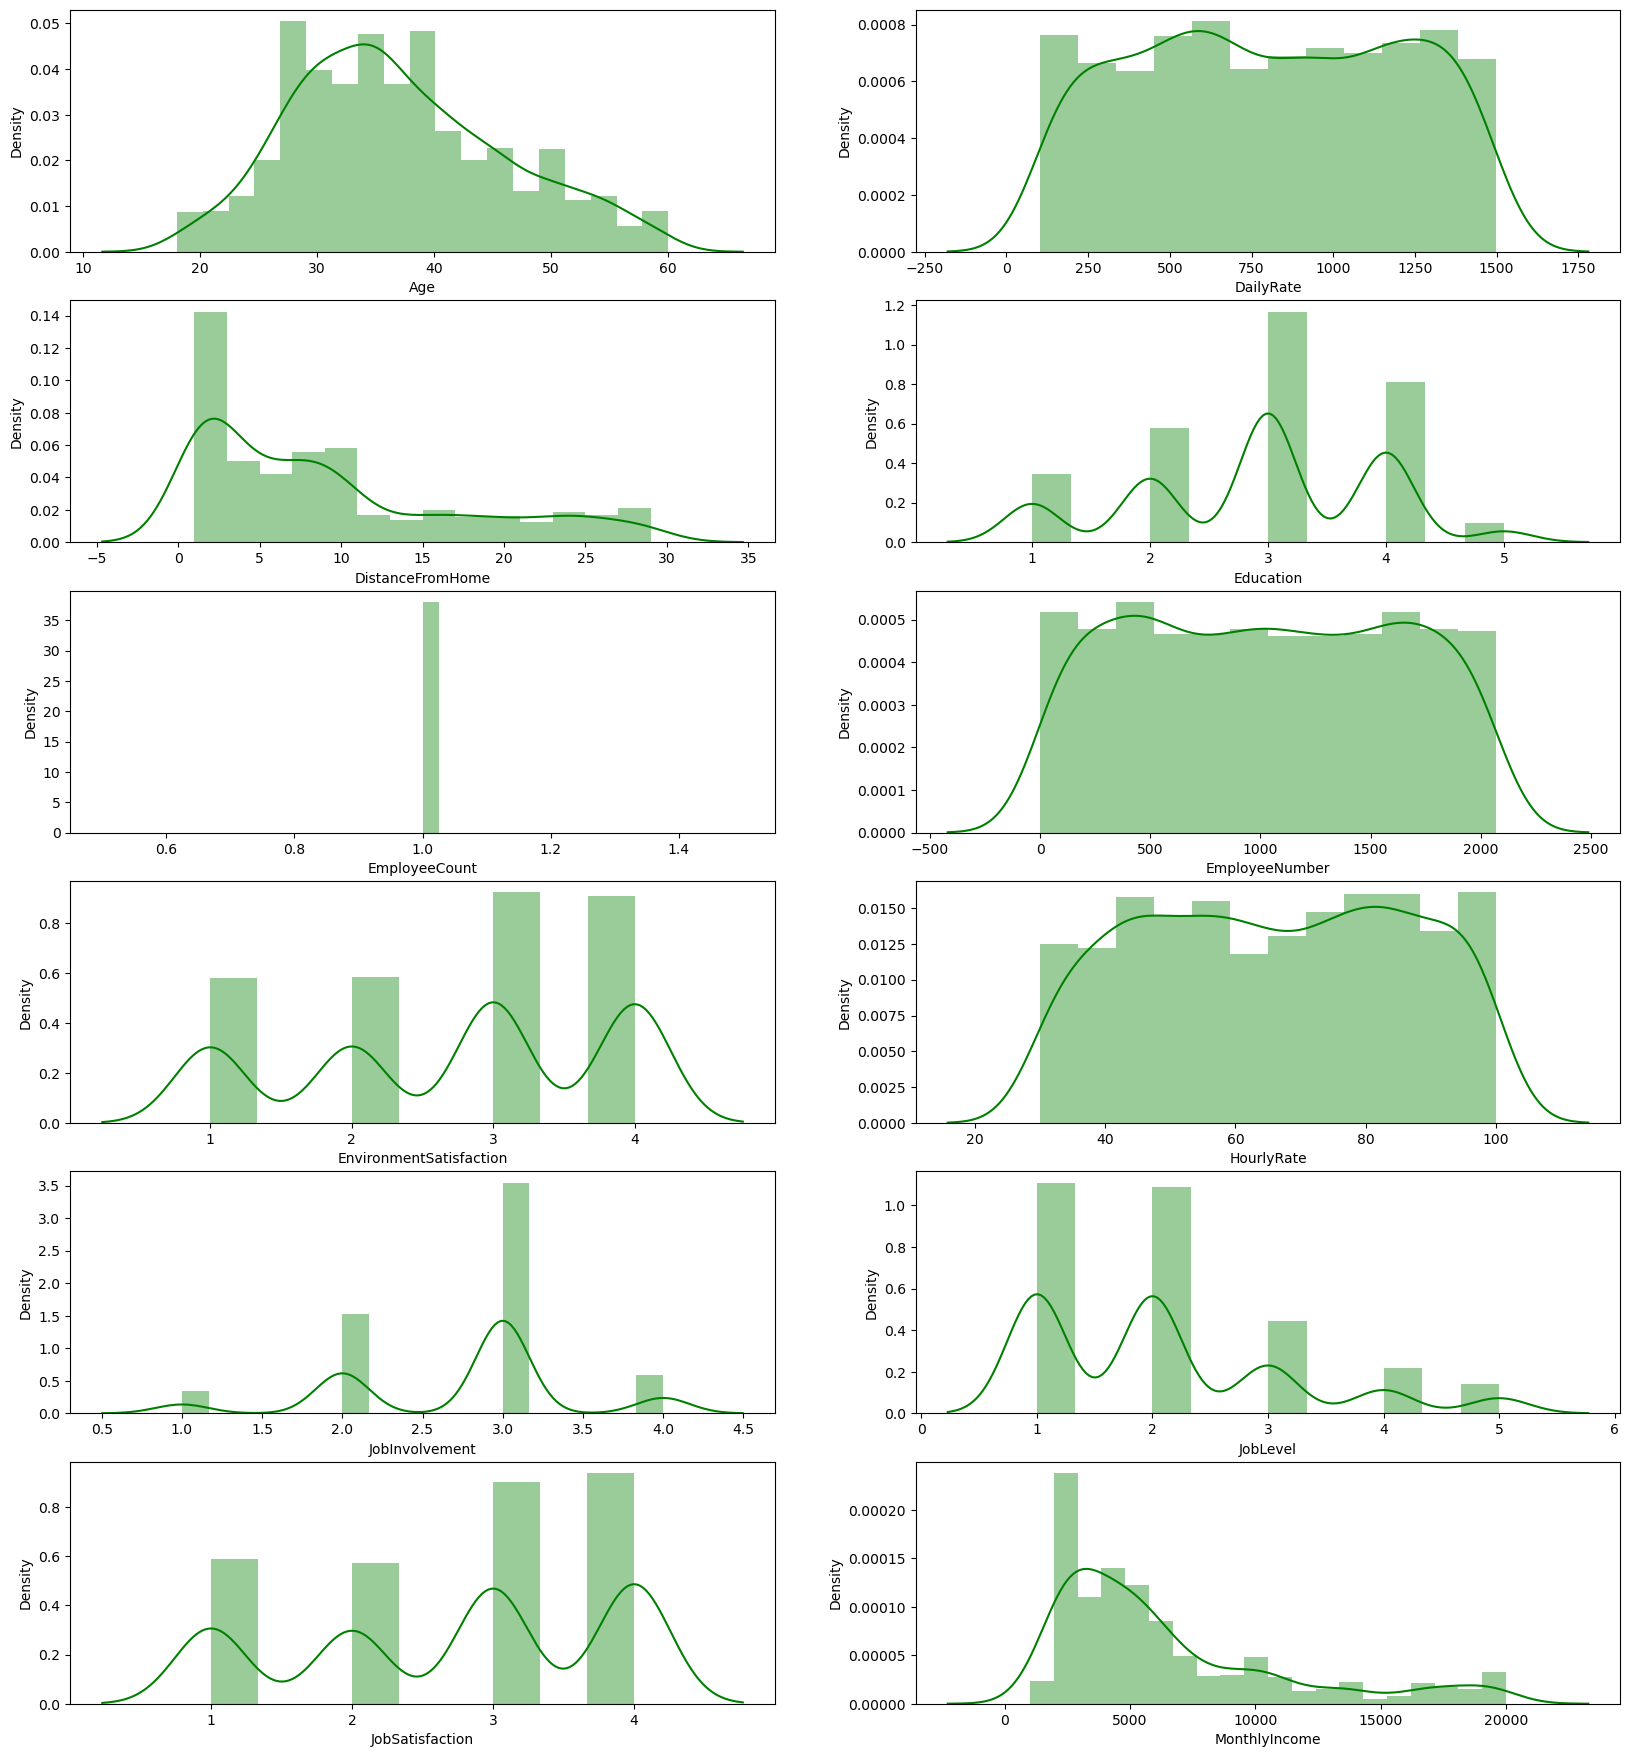

In [63]:
y = df_num.columns
fig , ax = plt.subplots(6 , 2 , figsize=(20,22))
for i,subplot in zip(y,ax.flatten()):
    sns.distplot(df_num[i],ax=subplot,color = 'g')        # distplot: used to check Normal distribution

### 2.3 Variable Transformation

In [64]:
def fun(df_num , var):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title('boxplot')
    sns.boxplot(df_num[var])
    plt.subplot(1,3,2)
    plt.title('hist')
    plt.hist(df_num[var])
    plt.subplot(1,3,3)
    plt.title('Probplot')
    stats.probplot(df_num[var],dist='norm',plot = plt)
    plt.show()

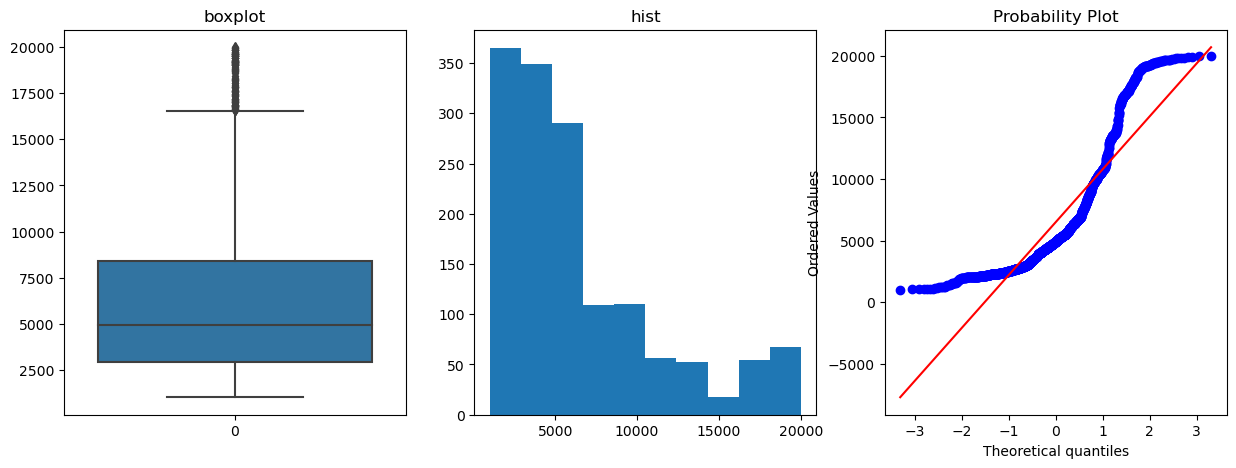

In [65]:
# Checking for 1 col.
fun(df_num,'MonthlyIncome')

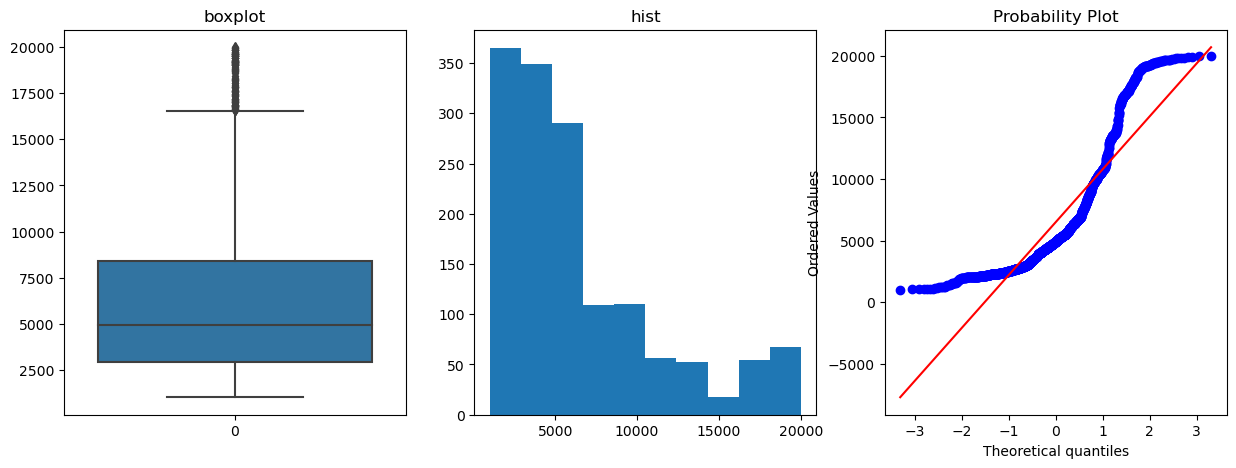

In [66]:
df_num['MonthlyIncome'+'_yoe'] , alpha = stats.yeojohnson(df_num['MonthlyIncome'])
fun(df_num,'MonthlyIncome')

In [67]:
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome_yoe'],
      dtype='object')

In [68]:
# We can see yeojohnson is working so we need to apply for all the col. 

In [69]:
# Applying yeojohnson for all numerical col.

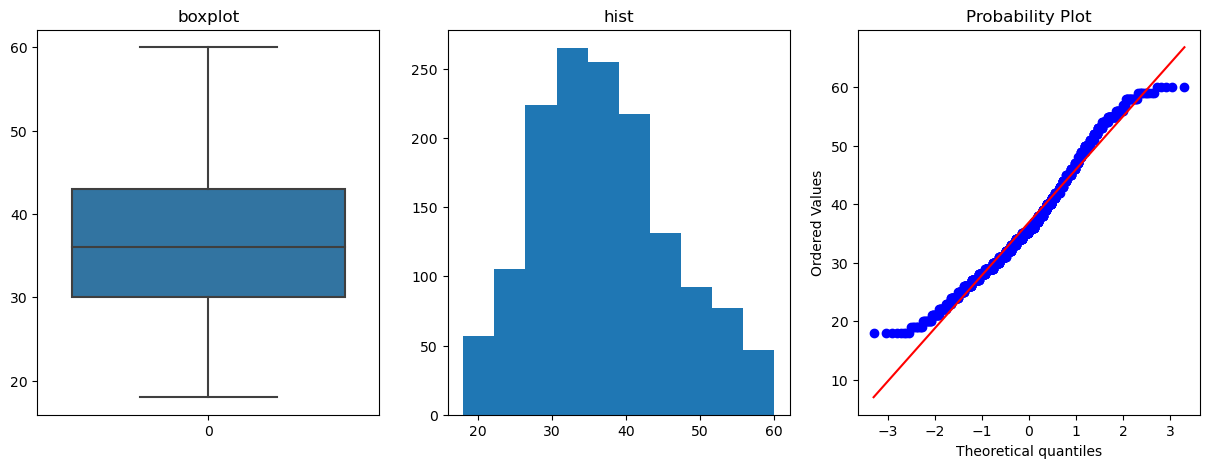

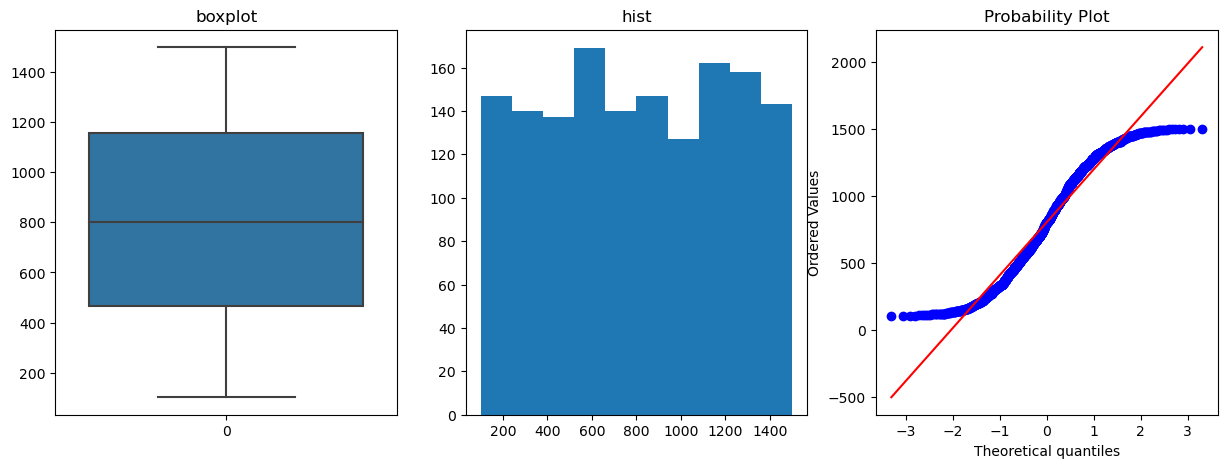

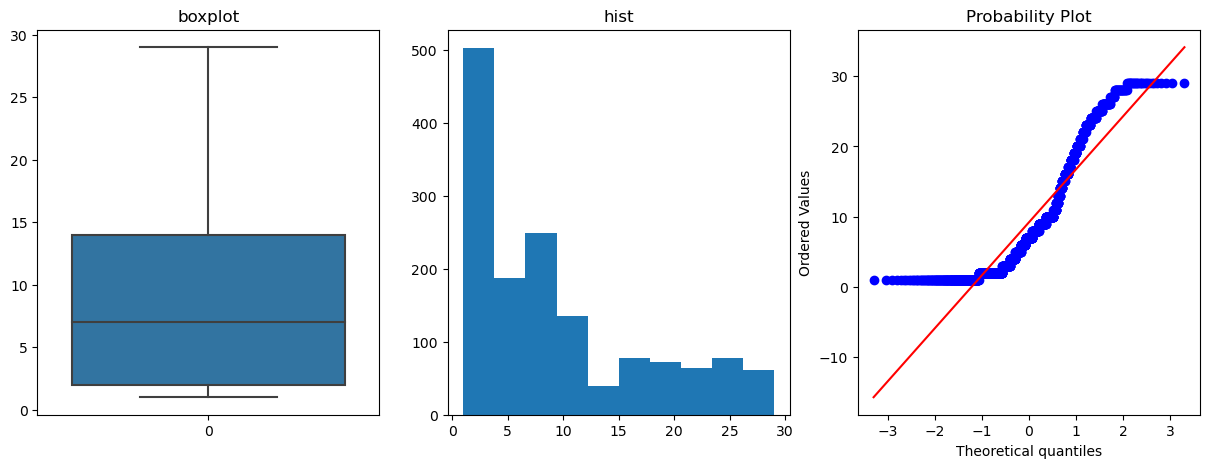

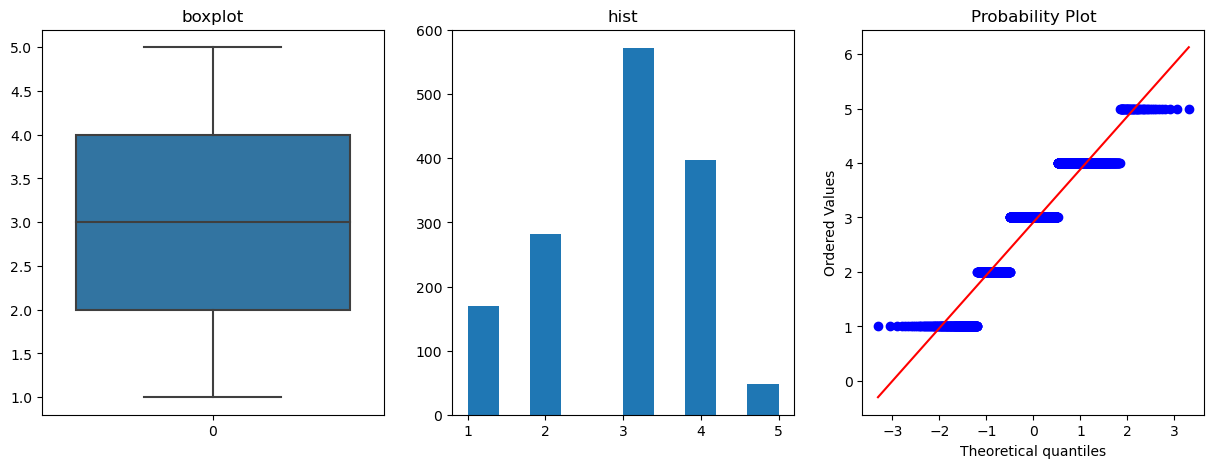

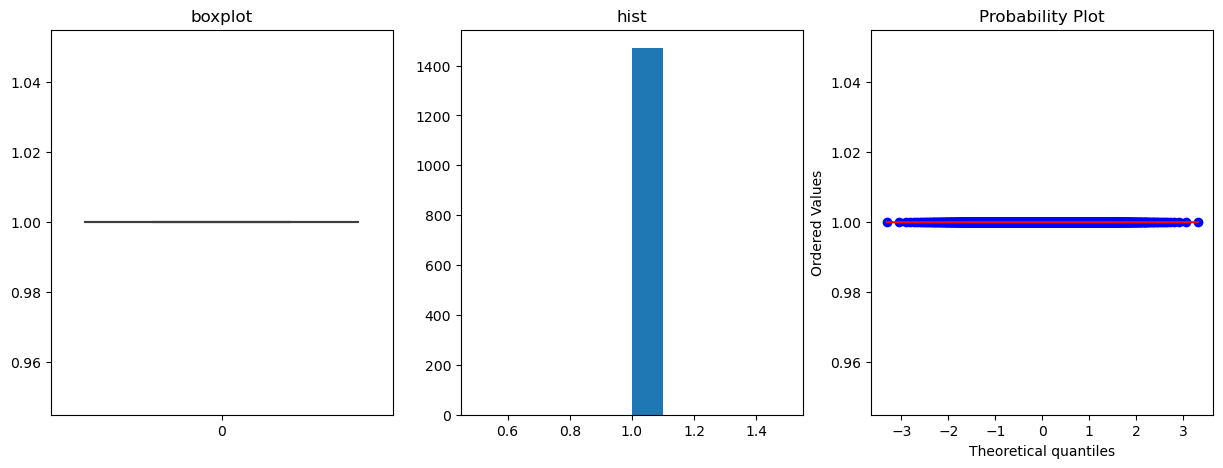

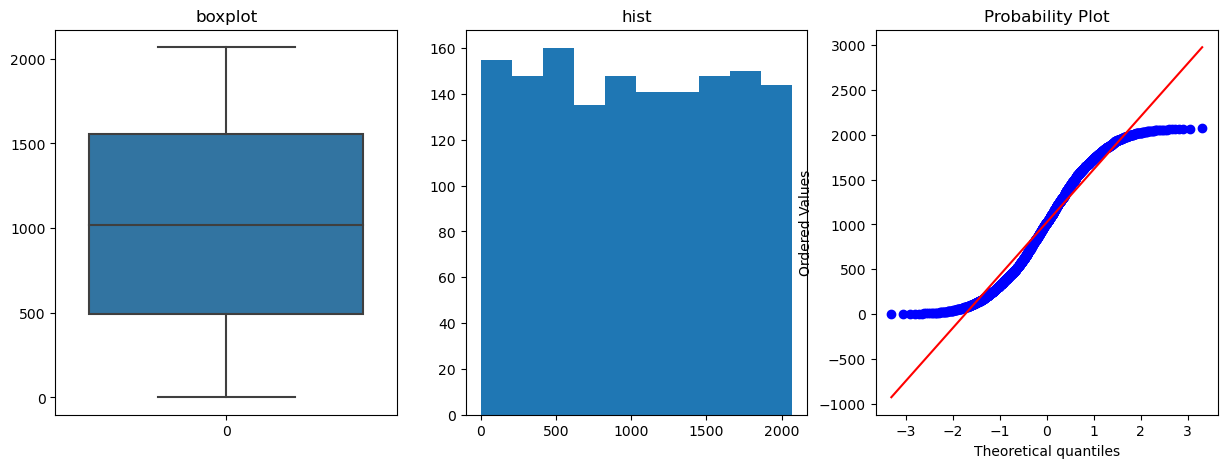

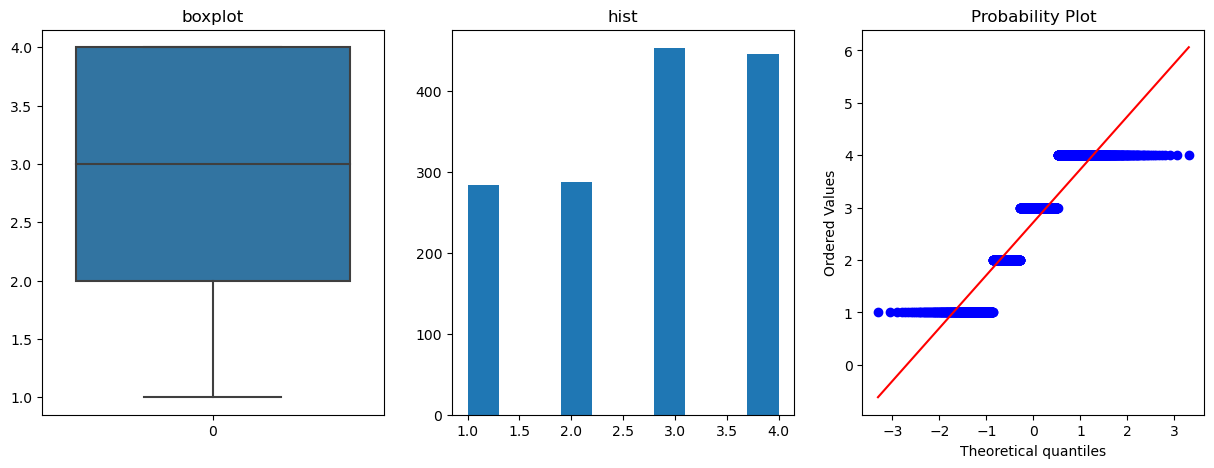

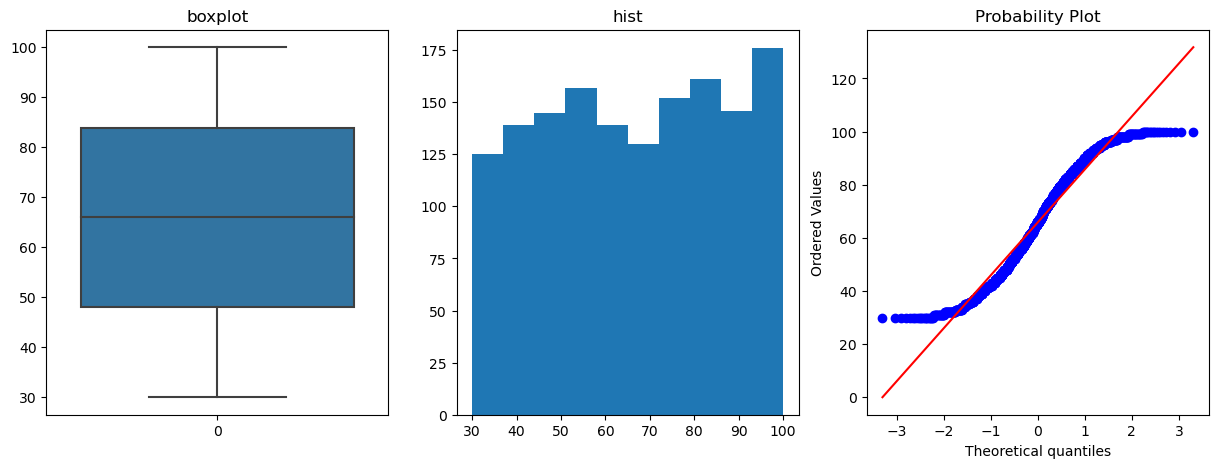

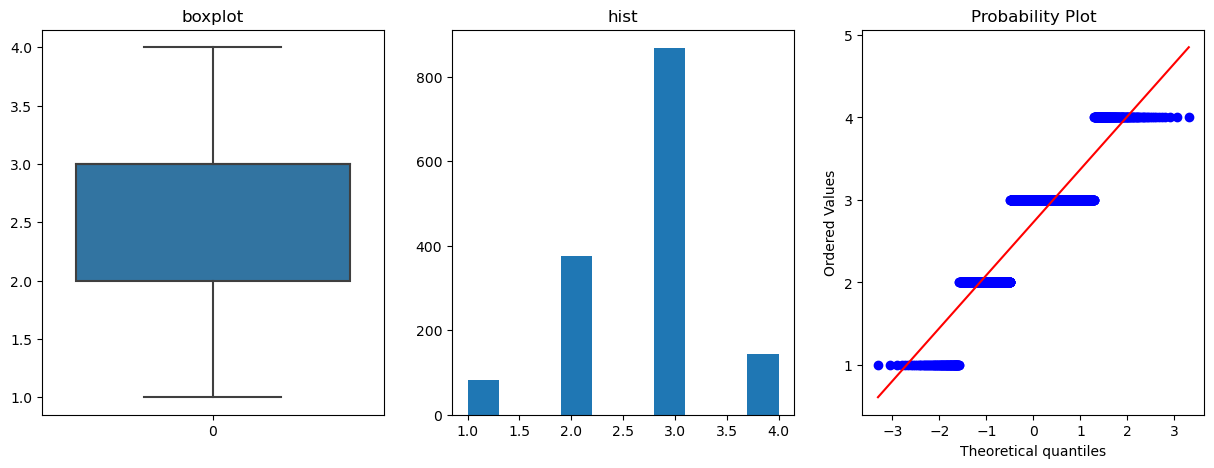

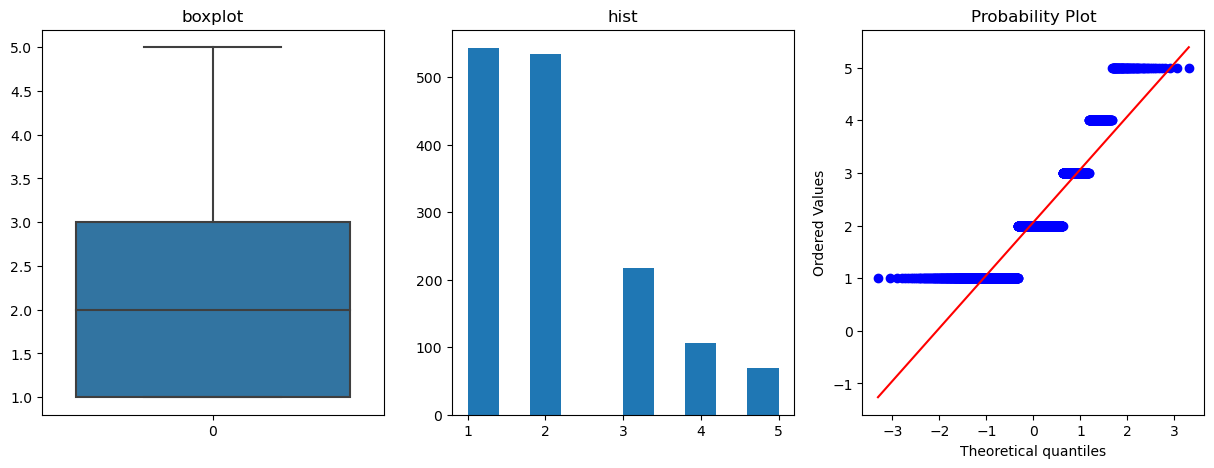

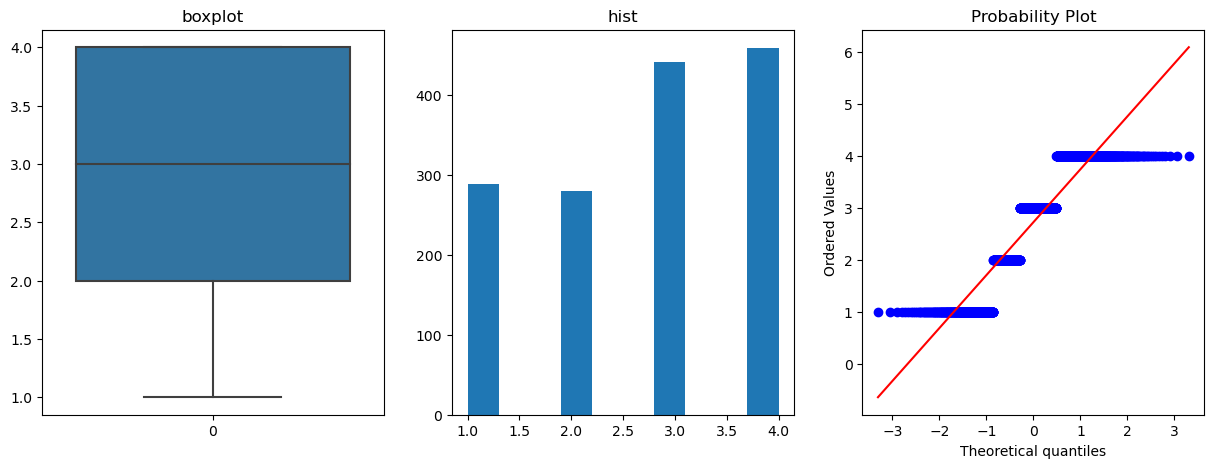

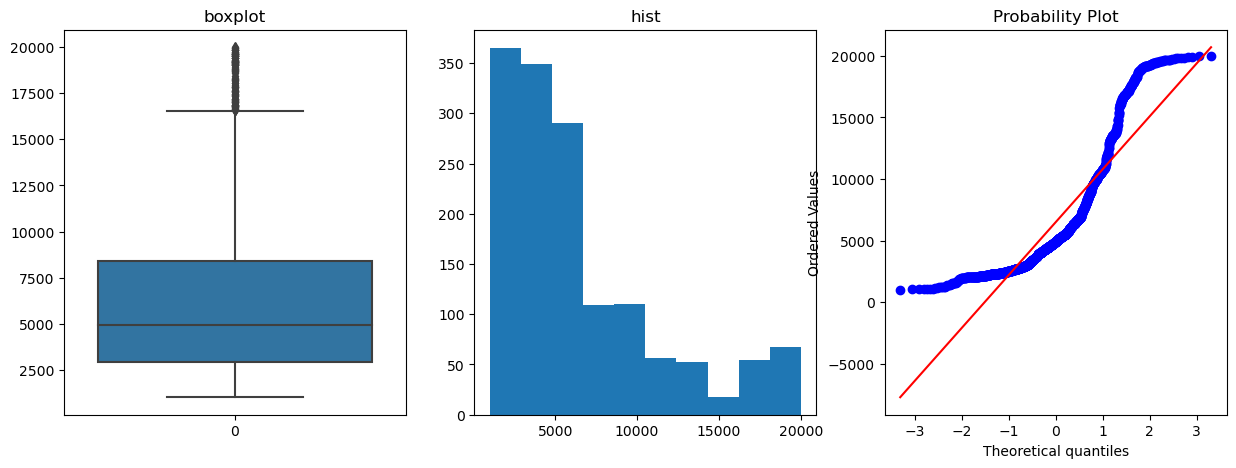

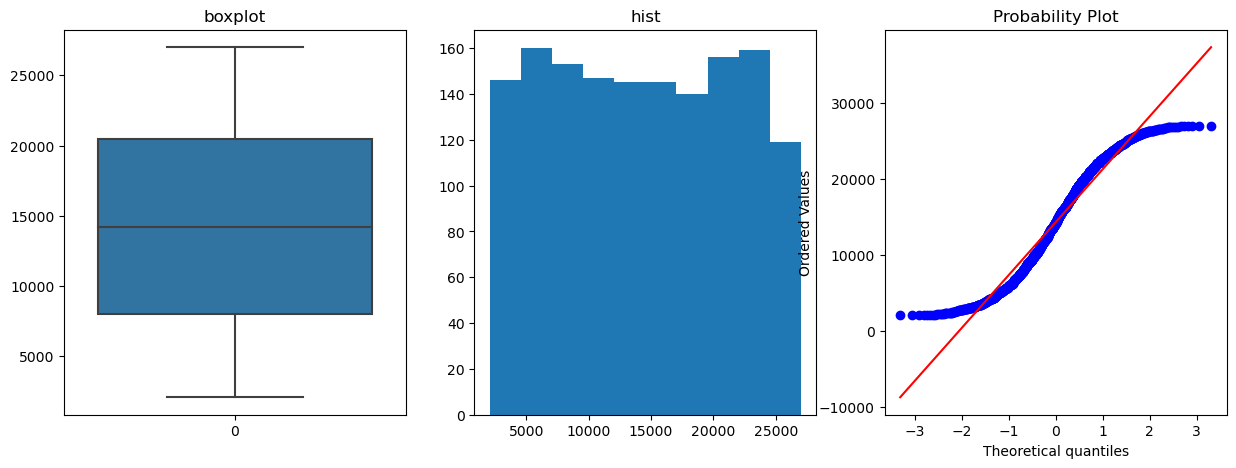

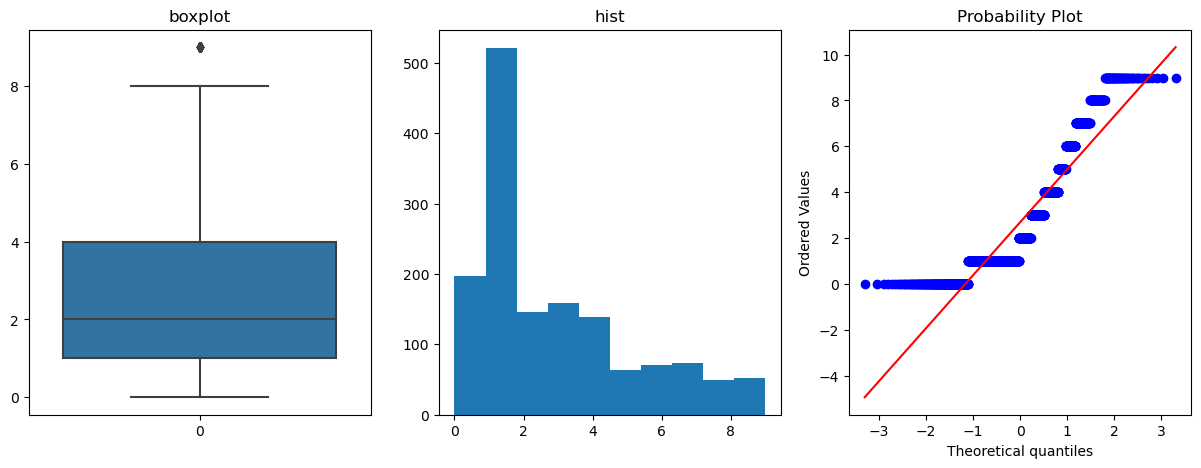

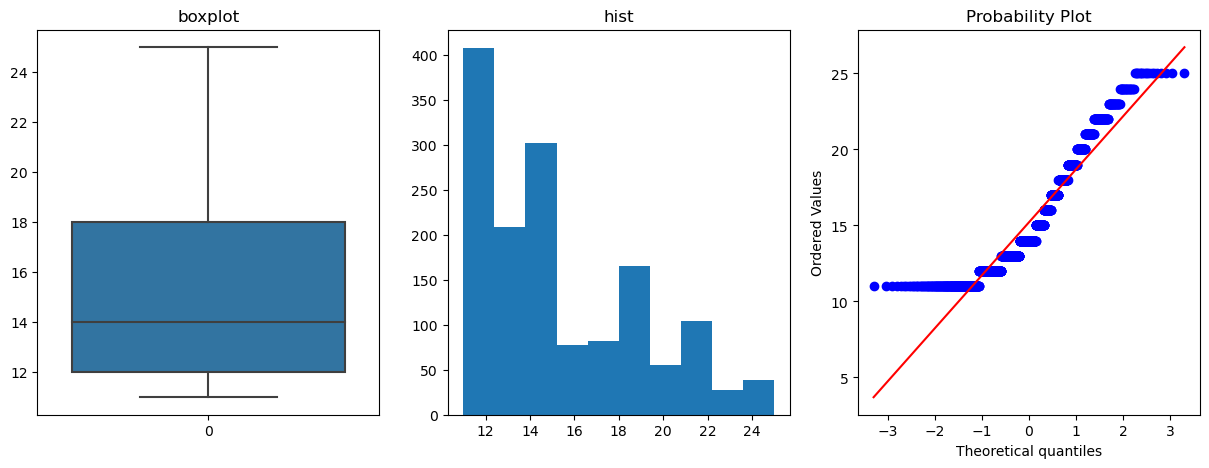

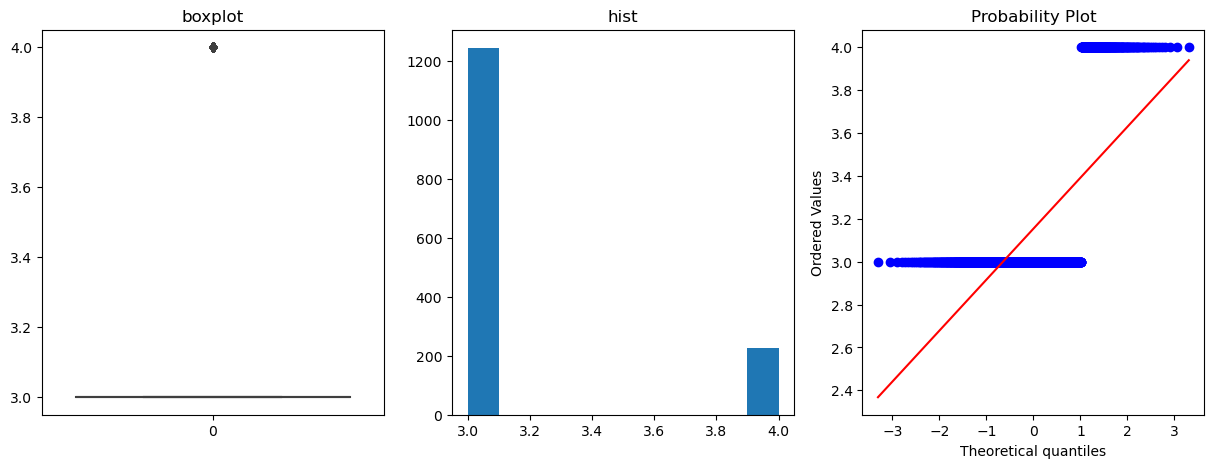

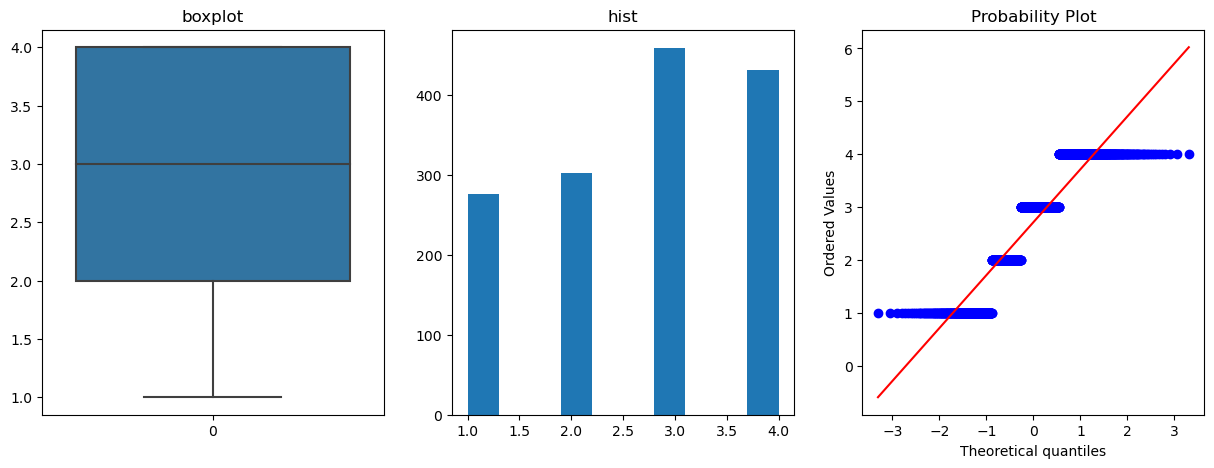

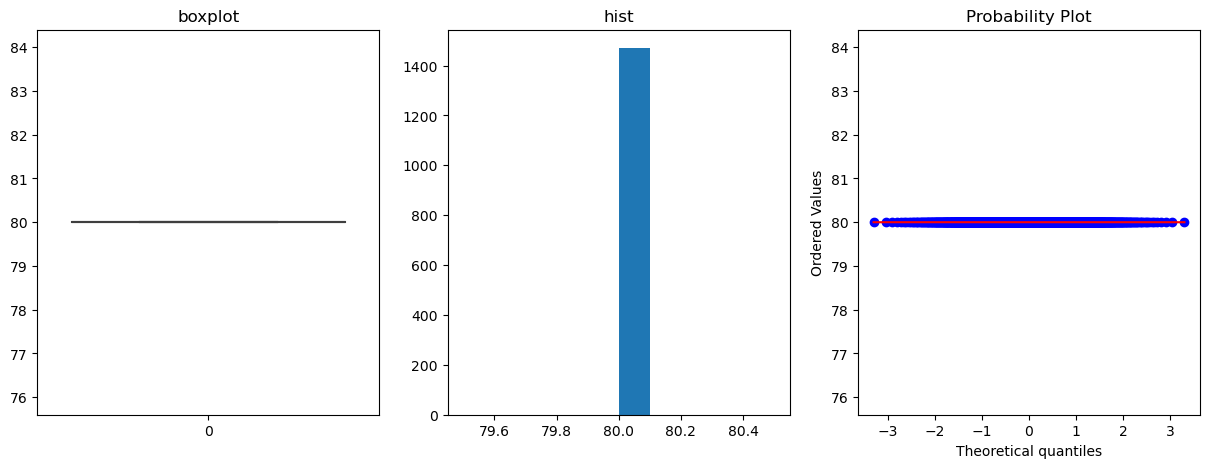

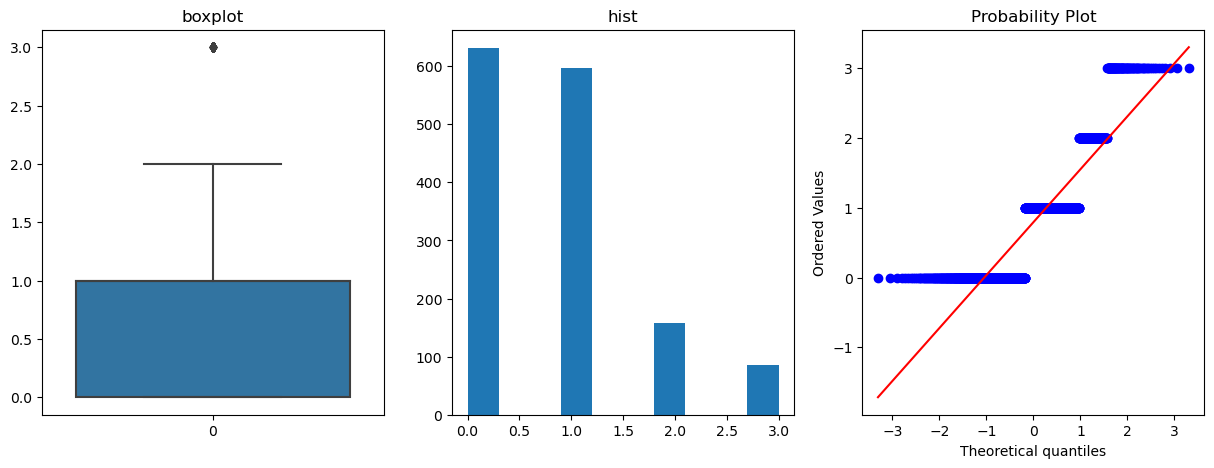

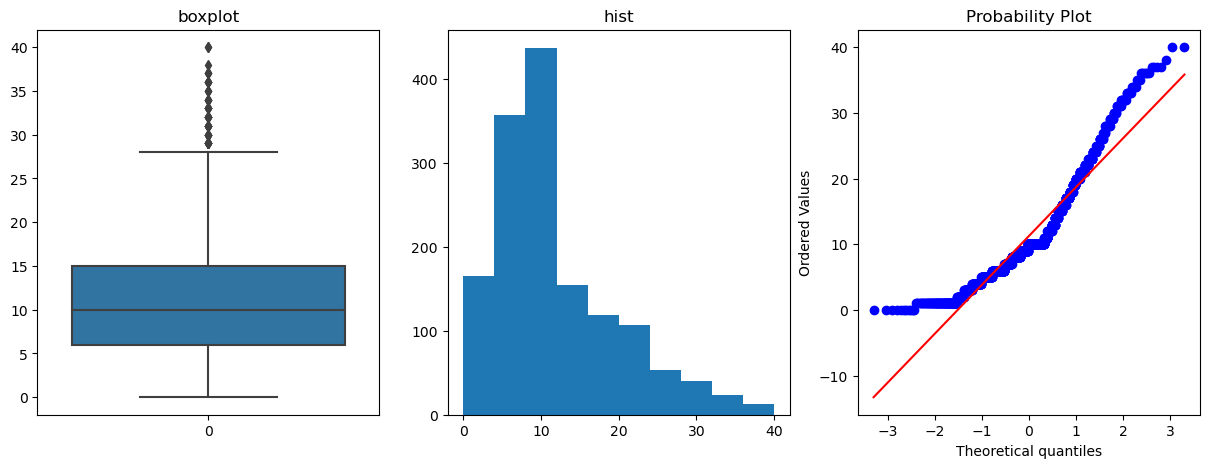

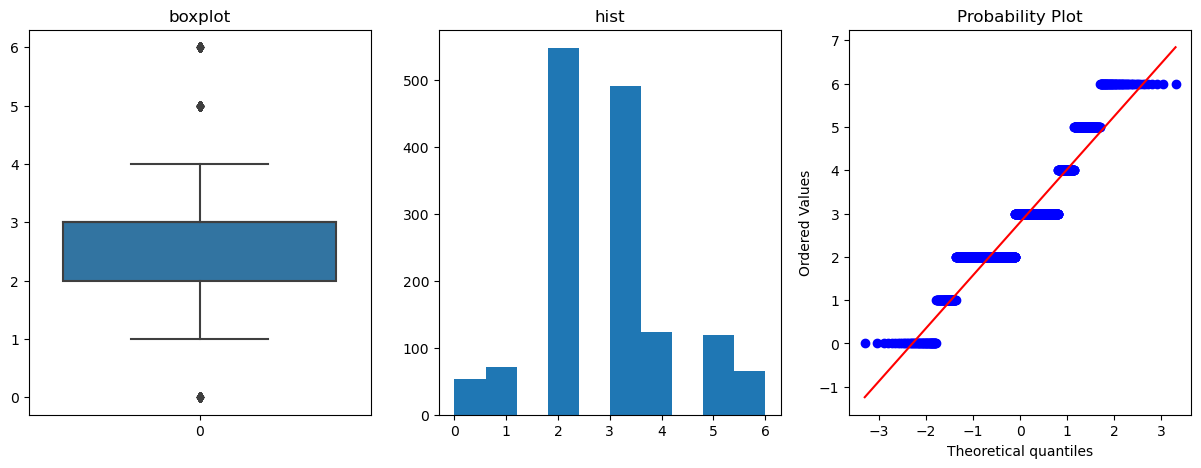

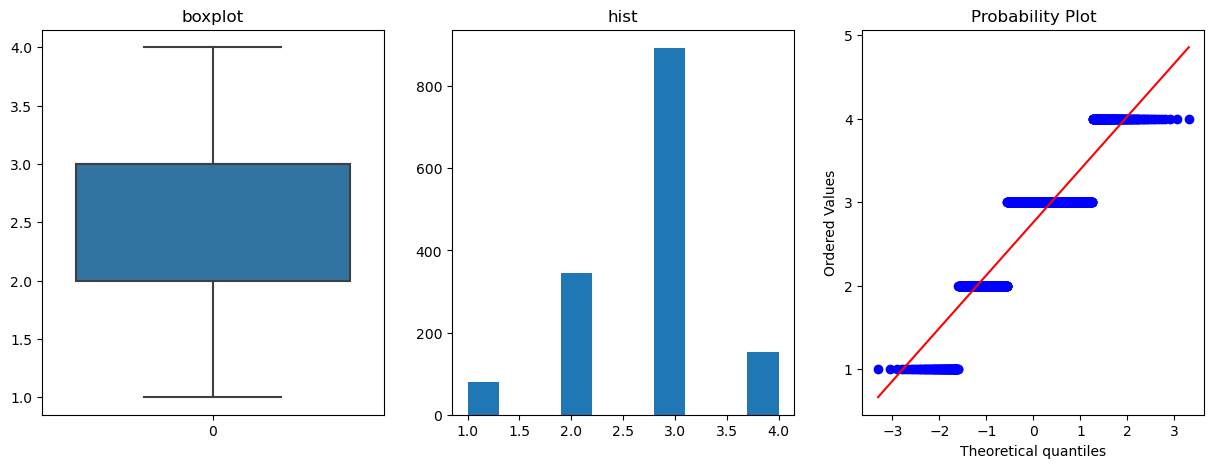

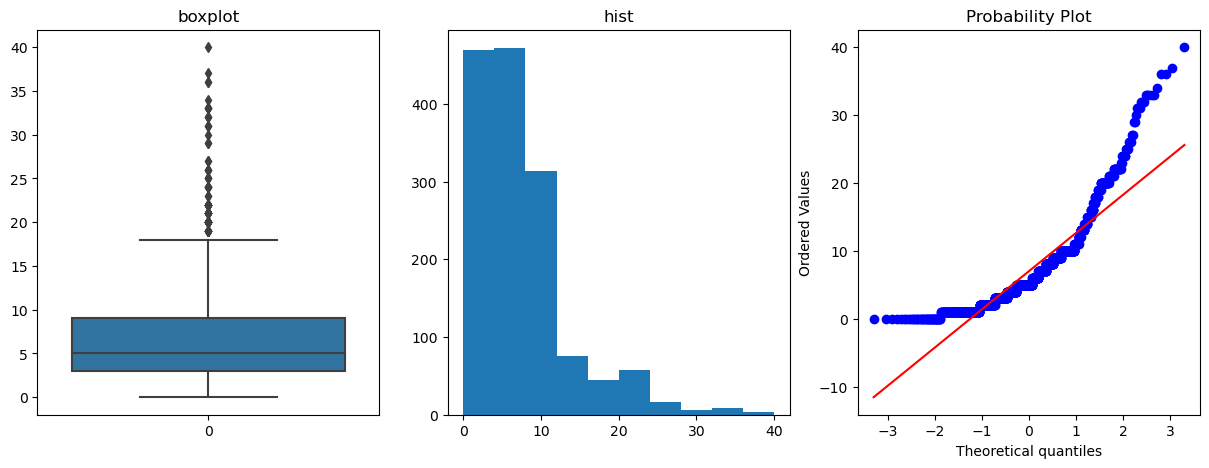

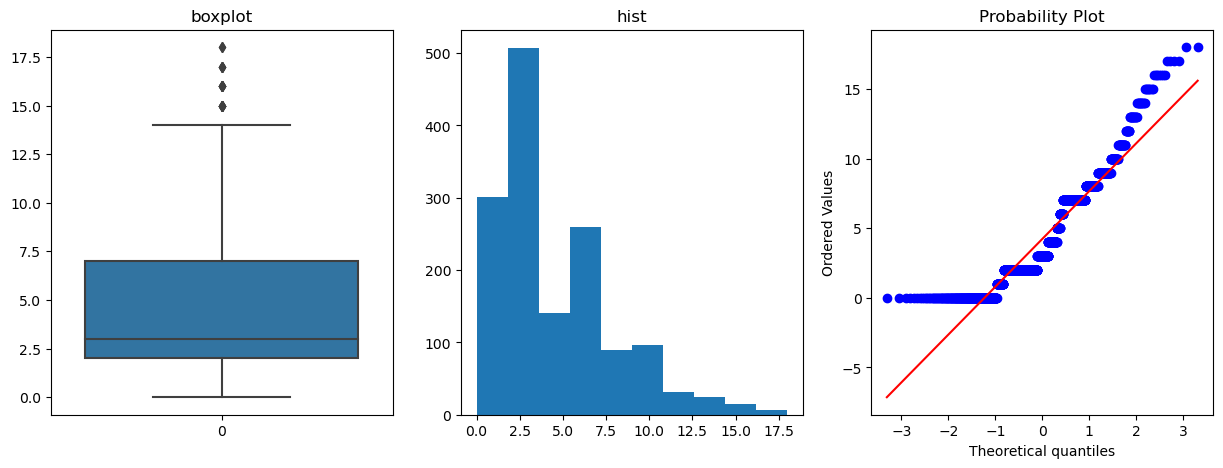

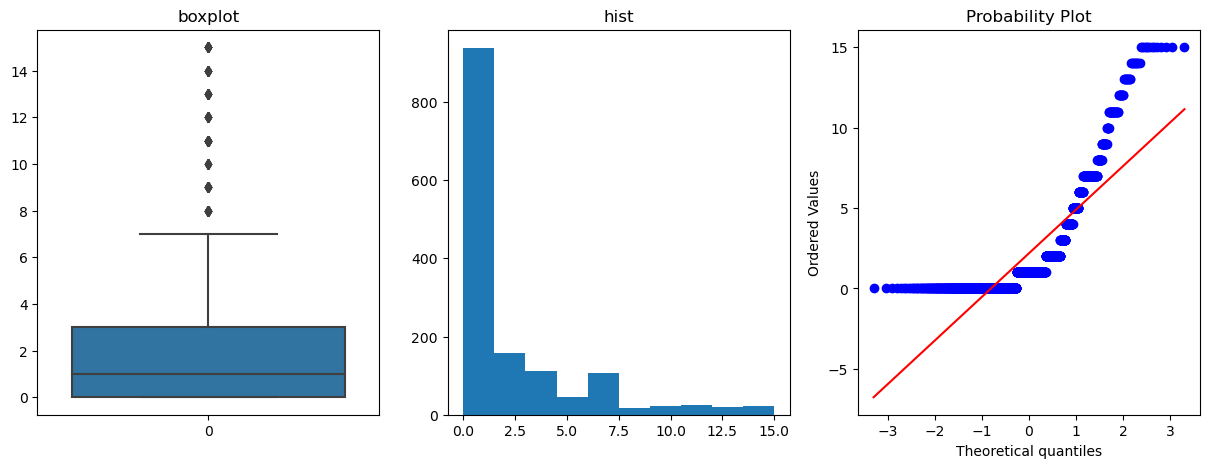

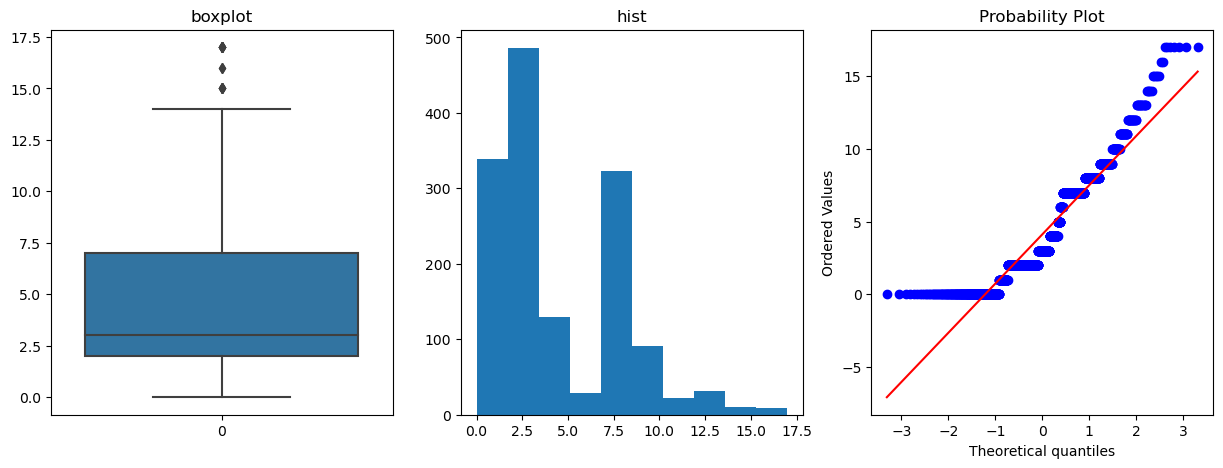

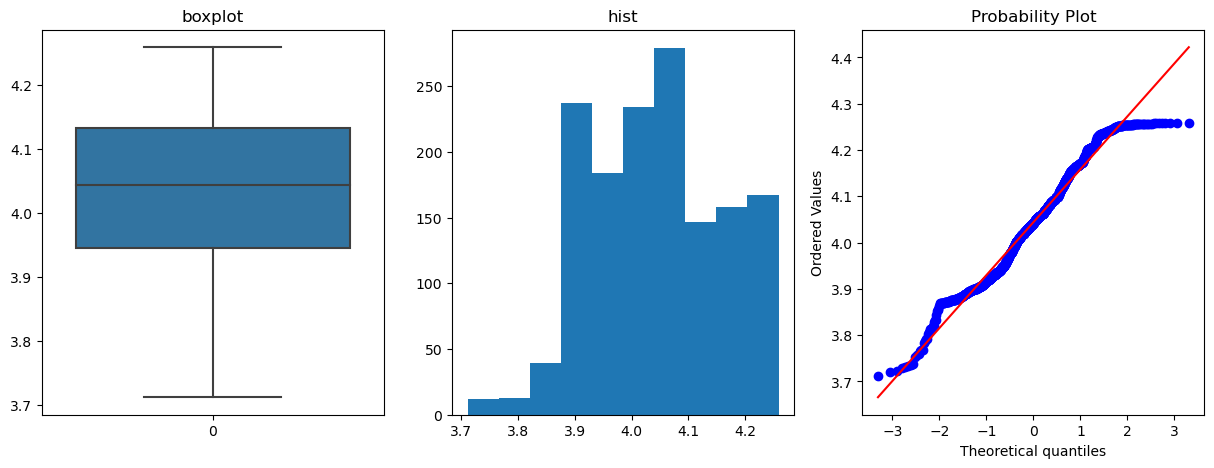

In [70]:
for i in df_num.columns:
    df_num[i+'_yoe'], alpha = stats.yeojohnson(df_num[i])
    fun(df_num , i)

In [71]:
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome_yoe',
       'Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
       'EmployeeCount_yoe', 'EmployeeNumber_yoe',
       'EnvironmentSatisfaction_yoe', 'HourlyRate_yoe', 'JobInvolvement_yoe',
       'JobLevel_yoe', 'JobSatisfaction_yoe', 'MonthlyRate_yoe',
       'NumCompaniesWorked_yoe', 'PercentSalaryHike_yoe',
       'PerformanceRating_yoe', 'RelationshipSatisfaction_yoe',
       'StandardHours_yoe', 'StockOpt

In [72]:
df_num.columns.shape

(53,)

In [73]:
df_num = df_num.drop(['MonthlyIncome_yoe_yoe'],axis = 1)            # dropping column which was already done for checking
df_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome_yoe',
       'Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
       'EmployeeCount_yoe', 'EmployeeNumber_yoe',
       'EnvironmentSatisfaction_yoe', 'HourlyRate_yoe', 'JobInvolvement_yoe',
       'JobLevel_yoe', 'JobSatisfaction_yoe', 'MonthlyRate_yoe',
       'NumCompaniesWorked_yoe', 'PercentSalaryHike_yoe',
       'PerformanceRating_yoe', 'RelationshipSatisfaction_yoe',
       'StandardHours_yoe', 'StockOpt

In [74]:
df_num.columns.shape

(52,)

### Ploting boxplot for original features

In [75]:
a = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

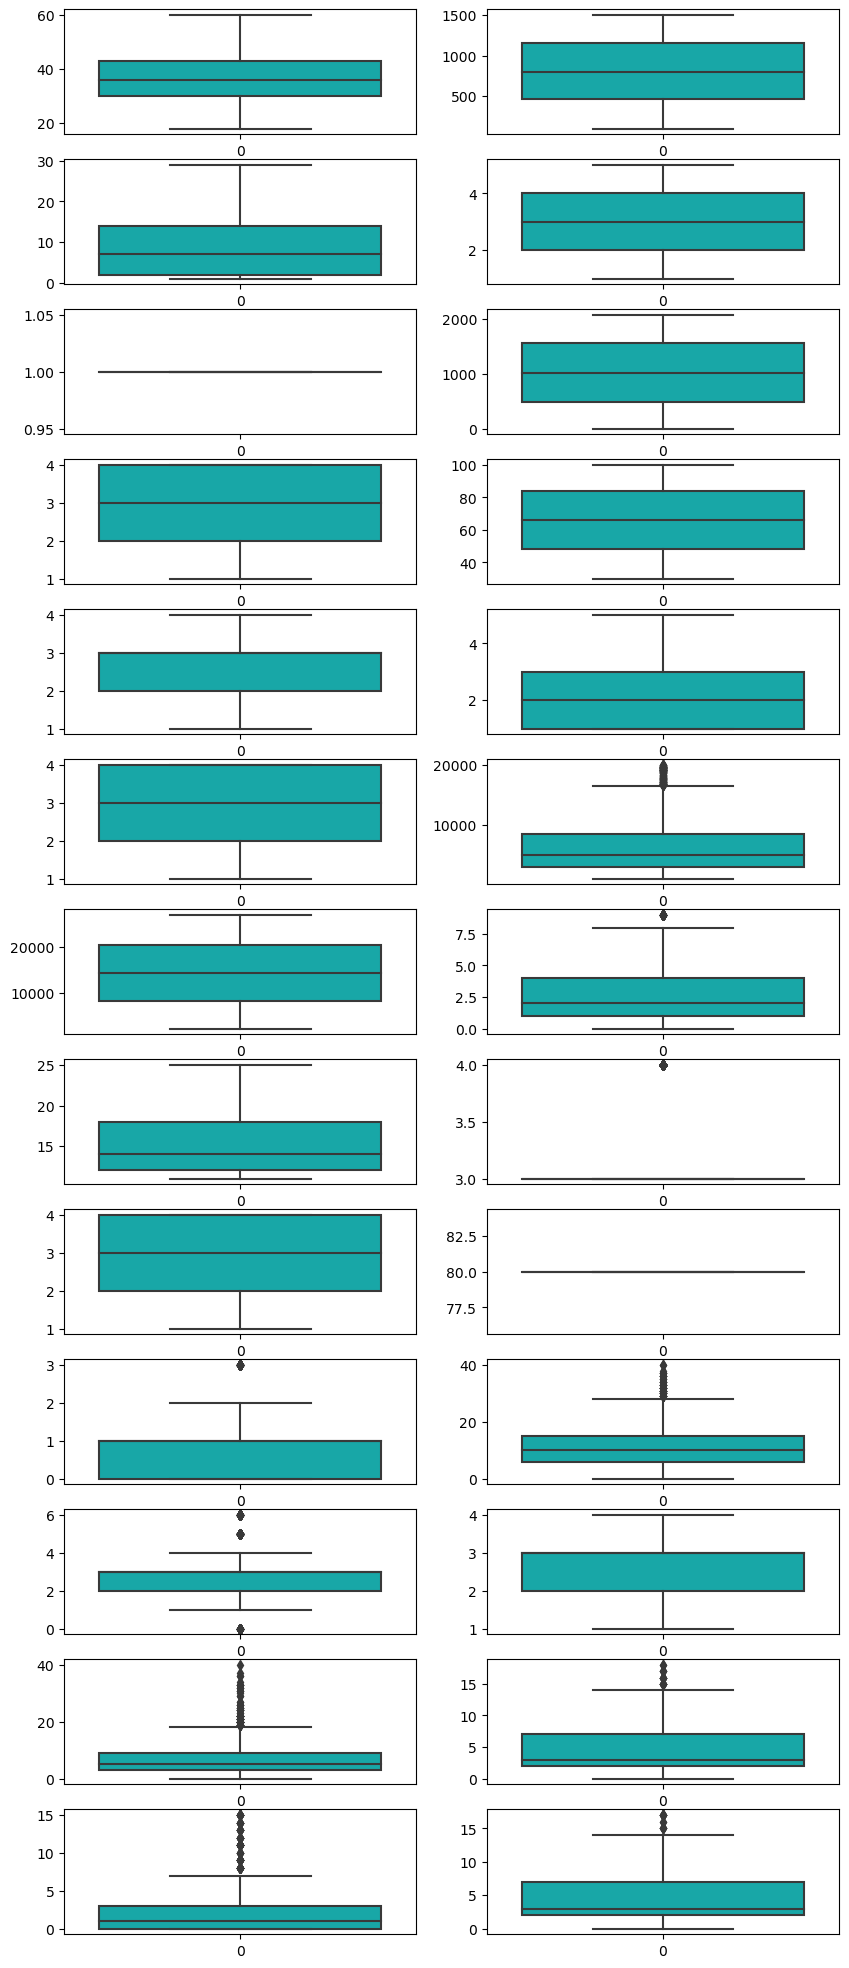

In [76]:
fig , ax = plt.subplots(13,2 , figsize=(10,25))
for i,subplot in zip(a,ax.flatten()):
    sns.boxplot(df_num[i],ax=subplot,color = 'c')   

### Ploting boxplot after applying yeojohnson

In [77]:
b = [  'Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
       'EmployeeCount_yoe', 'EmployeeNumber_yoe',
       'EnvironmentSatisfaction_yoe', 'HourlyRate_yoe', 'JobInvolvement_yoe',
       'JobLevel_yoe', 'JobSatisfaction_yoe', 'MonthlyIncome_yoe', 'MonthlyRate_yoe',
       'NumCompaniesWorked_yoe', 'PercentSalaryHike_yoe',
       'PerformanceRating_yoe', 'RelationshipSatisfaction_yoe',
       'StandardHours_yoe', 'StockOptionLevel_yoe', 'TotalWorkingYears_yoe',
       'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe',
       'YearsAtCompany_yoe', 'YearsInCurrentRole_yoe',
       'YearsSinceLastPromotion_yoe', 'YearsWithCurrManager_yoe']

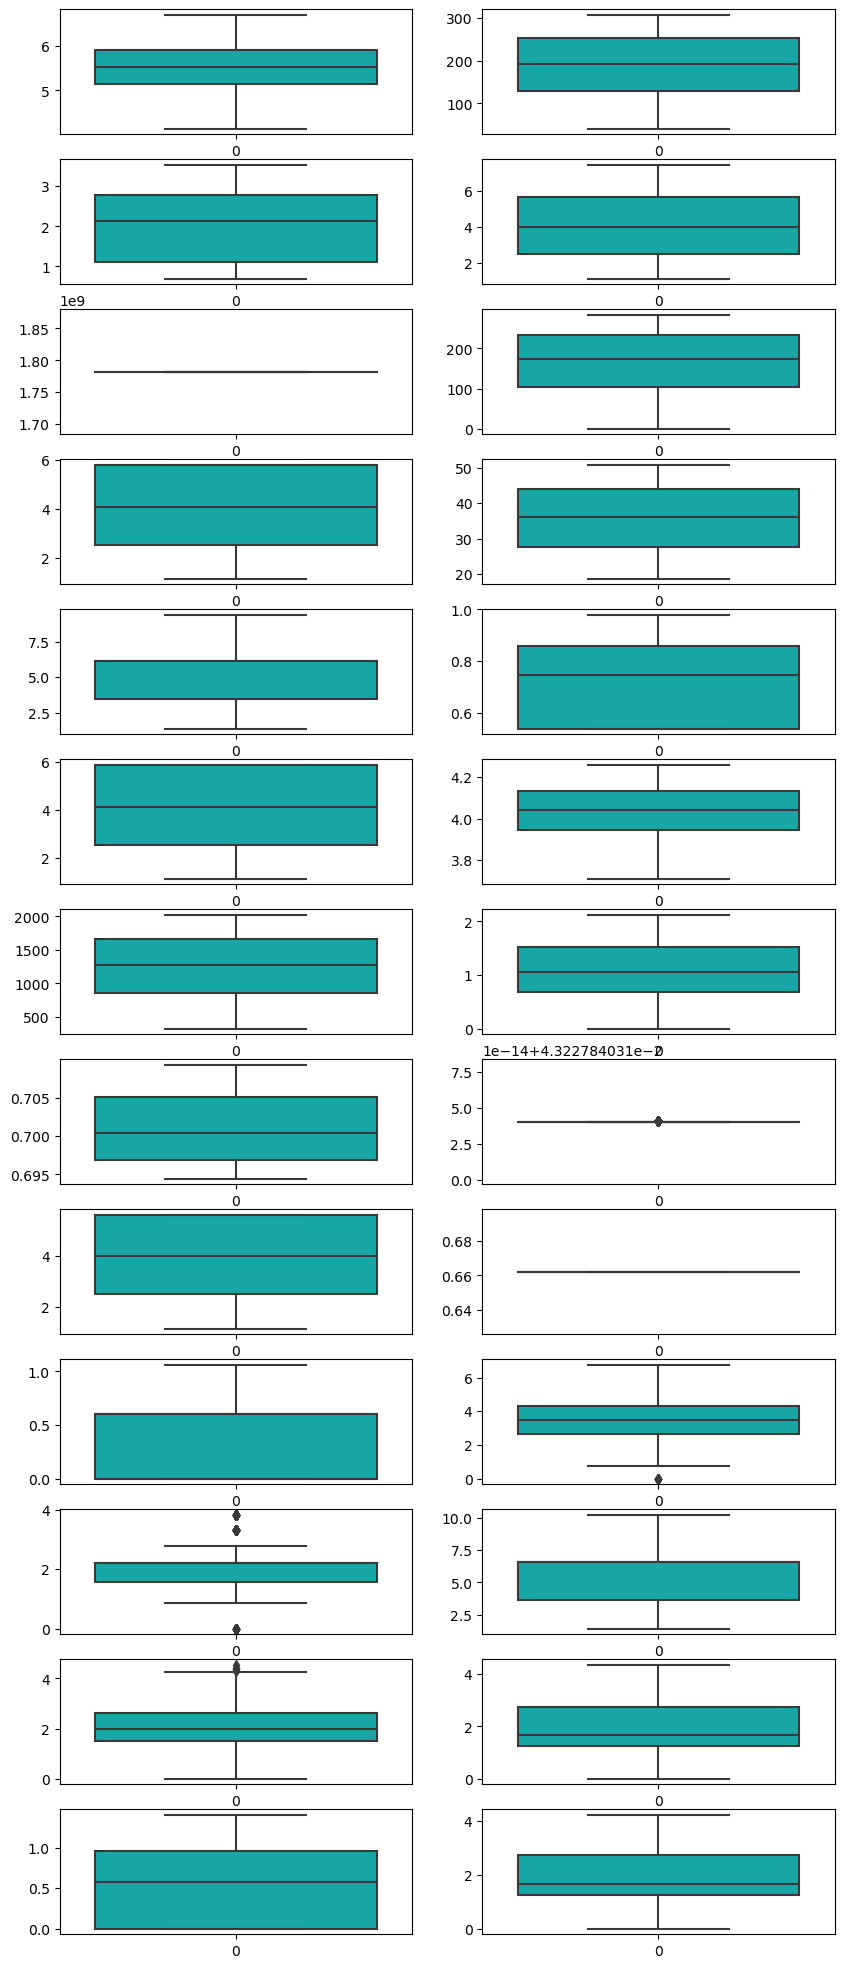

In [78]:
fig , ax = plt.subplots(13,2 , figsize=(10,25))
for i,subplot in zip(b,ax.flatten()):
    sns.boxplot(df_num[i],ax=subplot,color = 'c')

In [79]:
b[4], b[15], b[17]            # deleting features which don't have proper data

('EmployeeCount_yoe', 'PerformanceRating_yoe', 'StandardHours_yoe')

In [80]:
er = ['EmployeeCount_yoe', 'PerformanceRating_yoe', 'StandardHours_yoe']

for i in er:
    print('The unique values in'+' '+i+' = '+str(df_num[i].unique()))
    print()

The unique values in EmployeeCount_yoe = [1.78204953e+09]

The unique values in PerformanceRating_yoe = [0.04322784 0.04322784]

The unique values in StandardHours_yoe = [0.66206886]



In [81]:
df_num_b = df_num[[  'Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
        'EmployeeNumber_yoe','EnvironmentSatisfaction_yoe', 'HourlyRate_yoe', 'JobInvolvement_yoe',
       'JobLevel_yoe', 'JobSatisfaction_yoe', 'MonthlyIncome_yoe', 'MonthlyRate_yoe',
       'NumCompaniesWorked_yoe', 'PercentSalaryHike_yoe','RelationshipSatisfaction_yoe',
        'StockOptionLevel_yoe', 'TotalWorkingYears_yoe',
       'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe',
       'YearsAtCompany_yoe', 'YearsInCurrentRole_yoe',
       'YearsSinceLastPromotion_yoe', 'YearsWithCurrManager_yoe']]

len(df_num_b.columns)

23

### Ploting boxplot after removing col. which don't have proper data

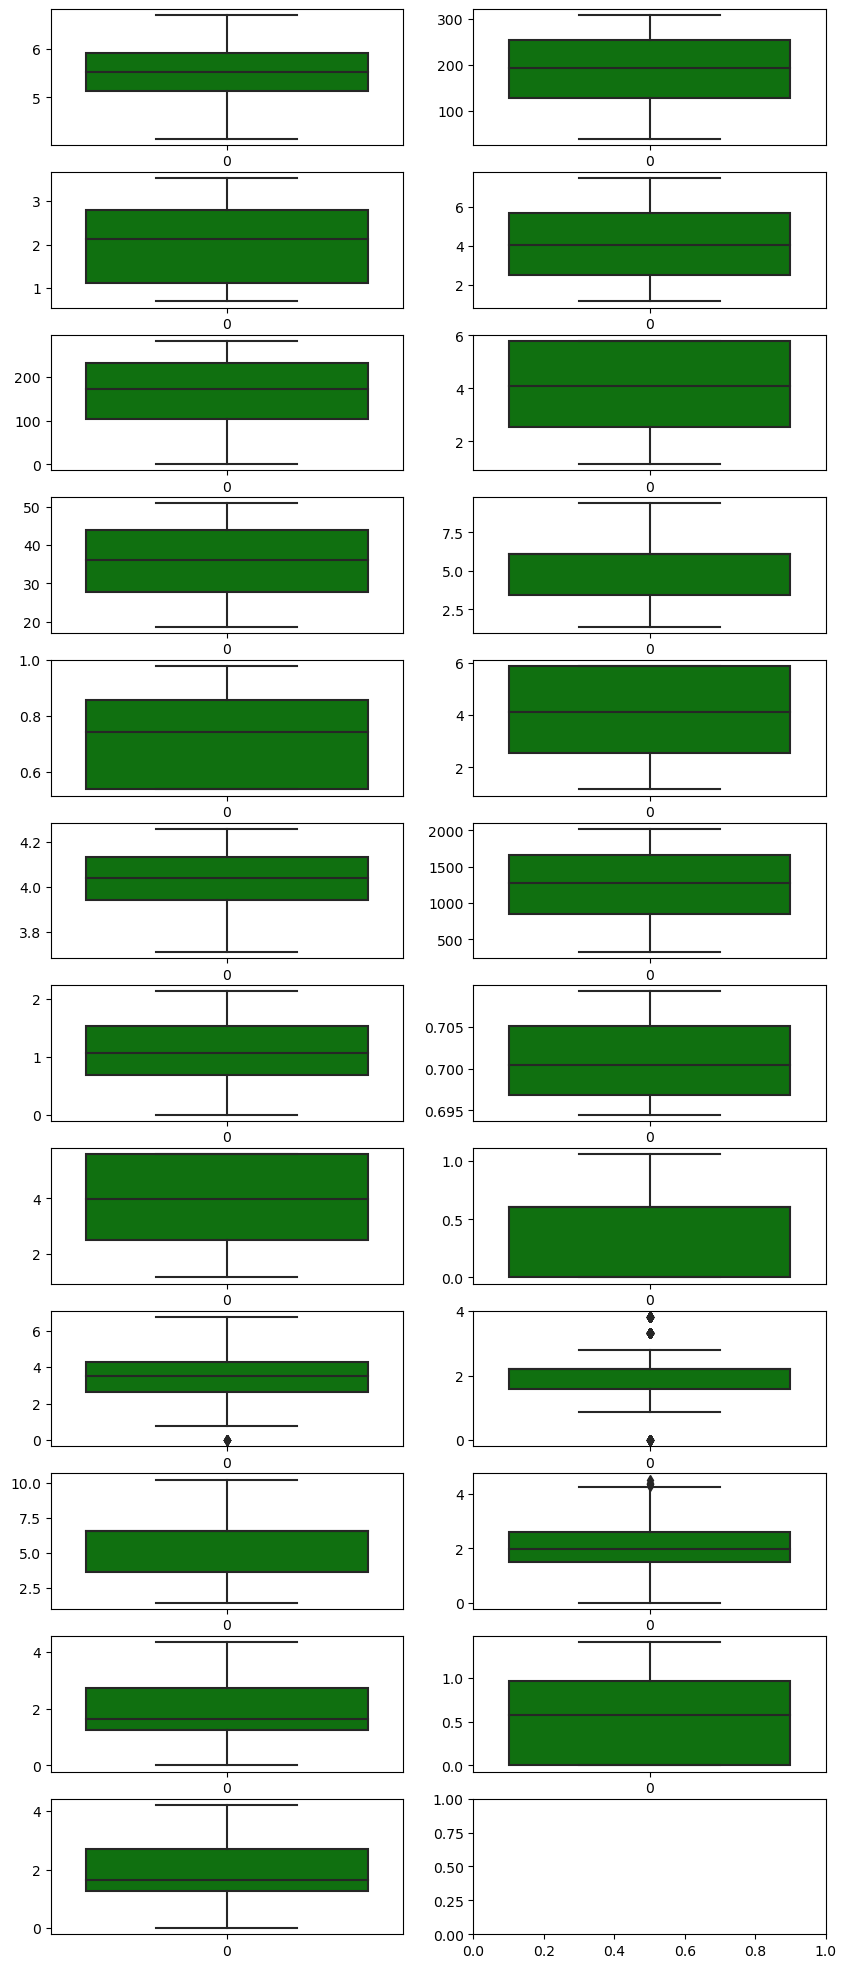

In [82]:
c = df_num_b.columns
fig , ax = plt.subplots(12 , 2 , figsize=(10,25))
for i,subplot in zip(c,ax.flatten()):
    sns.boxplot(df_num_b[i],ax=subplot,color = 'g')

In [83]:
# We can see there are outliers left in some of the columns so we need to handle outliers so as to get better results

### 2.4 Handling Outliers using IQR technique with 5th & 95th

In [84]:
df_cap = df_num_b.copy()

In [85]:
def iqr_capping(df, cols, factor):             # handing the outliers
    for col in cols: 
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - (factor * iqr)
        upper_limit = q3 + (factor * iqr)
        
        df[col] = np.where(df[col]>upper_limit, upper_limit, 
                 np.where(df[col]<lower_limit, lower_limit, df[col])) 

In [86]:
iqr_capping(df_cap, df_num_b, 1.5)

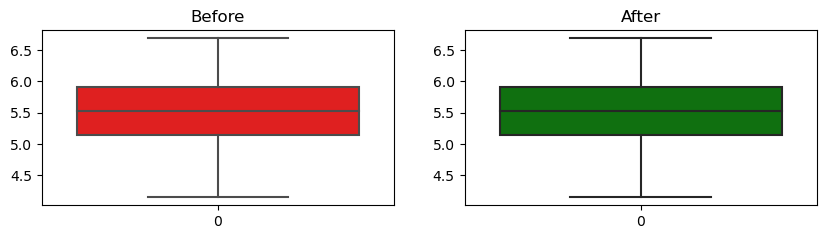

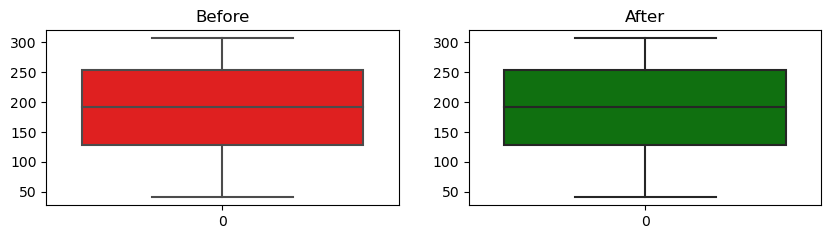

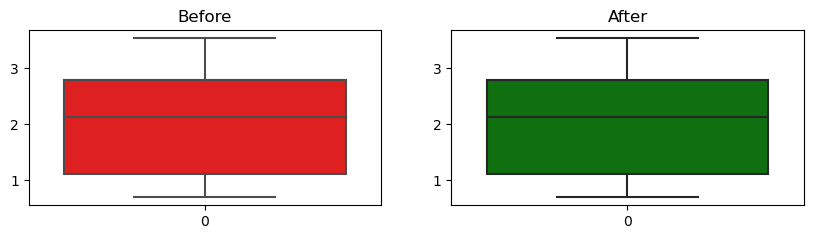

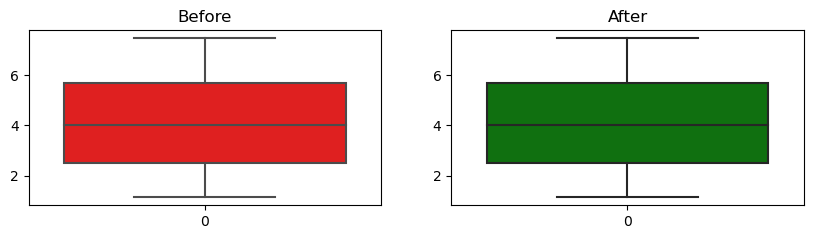

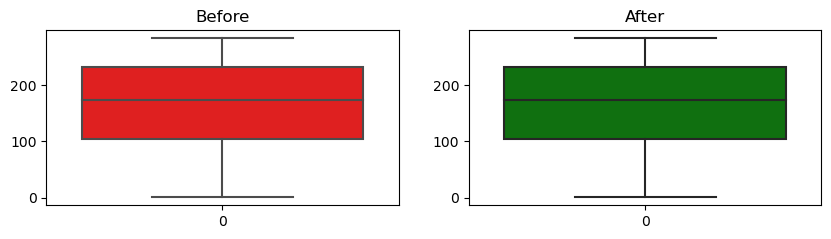

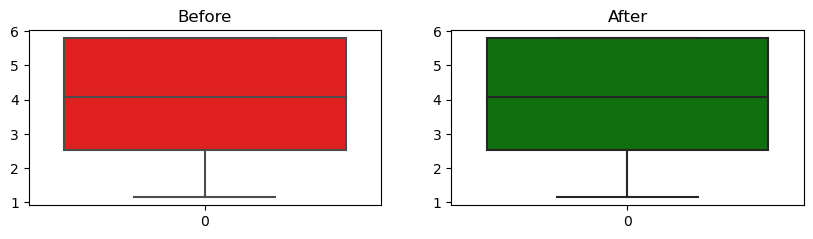

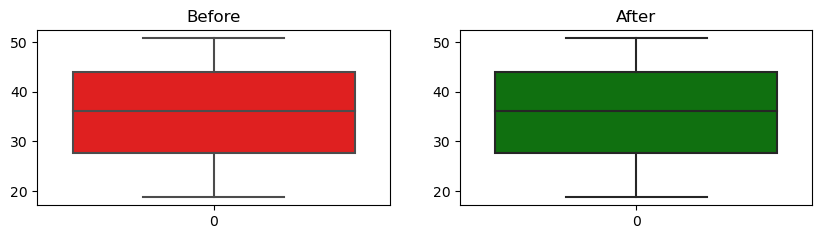

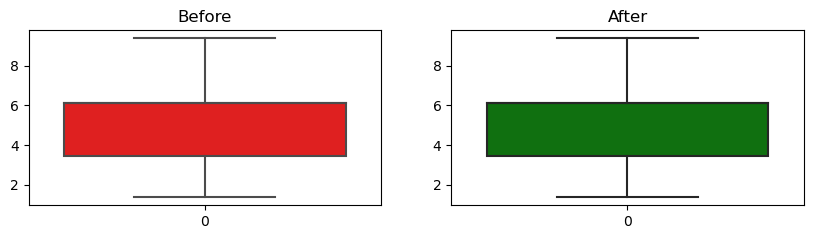

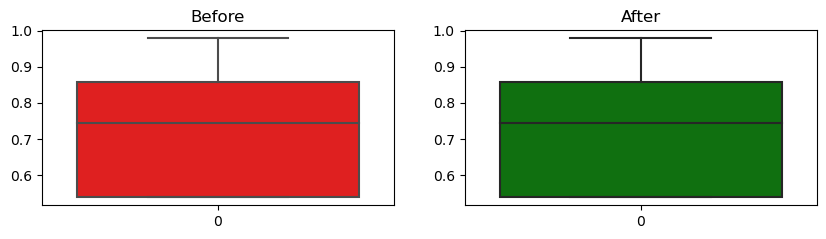

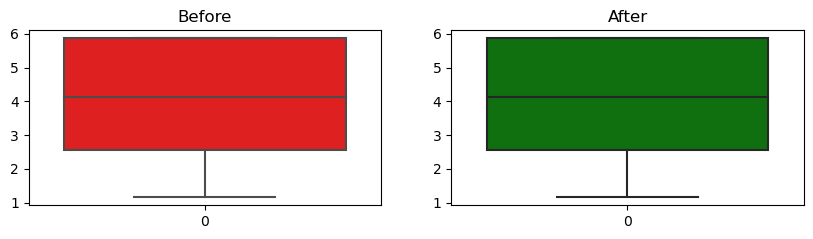

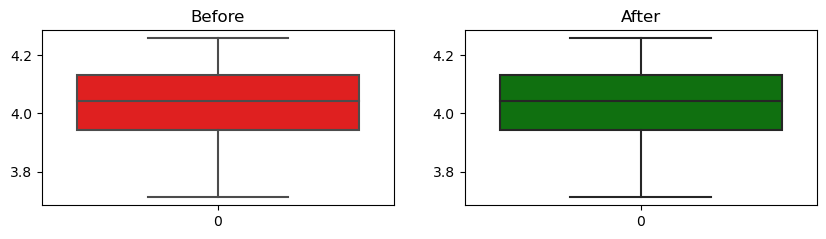

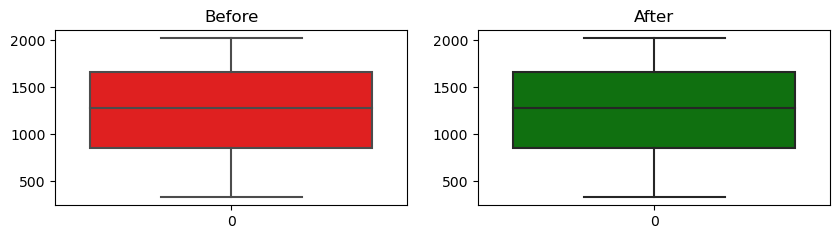

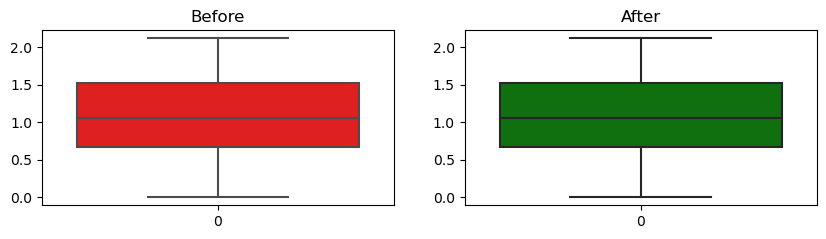

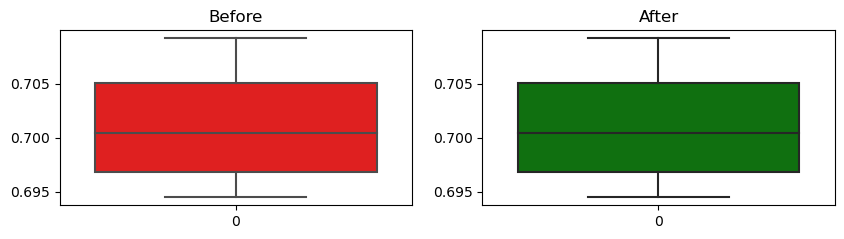

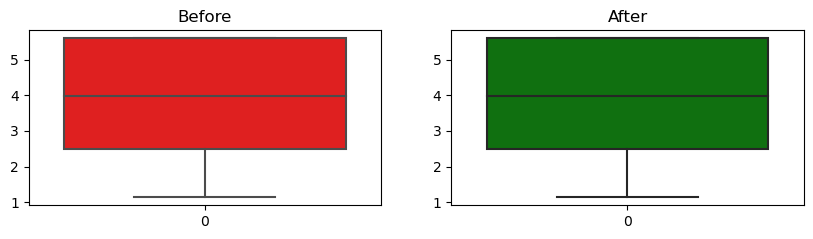

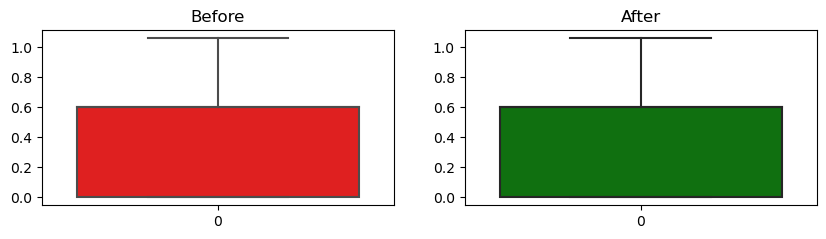

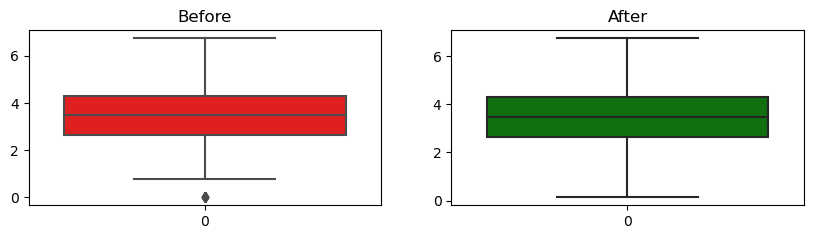

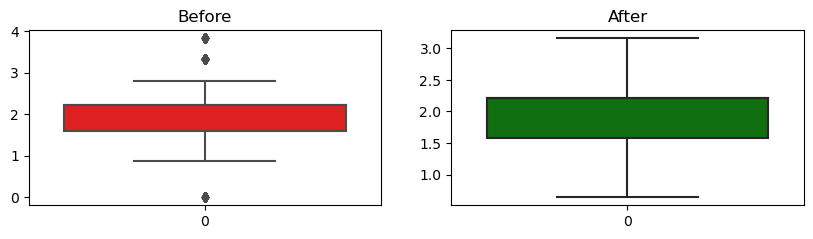

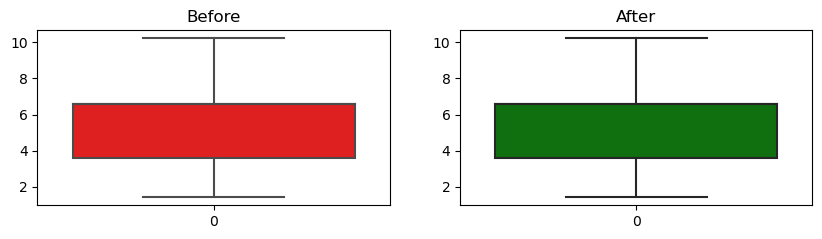

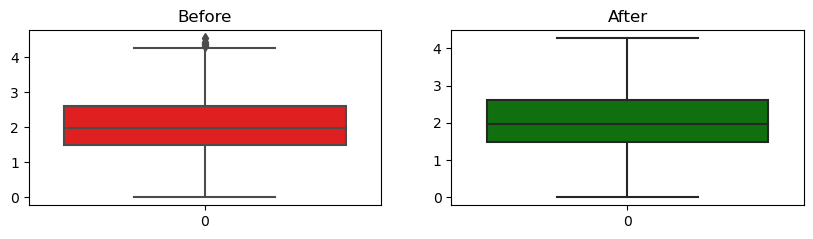

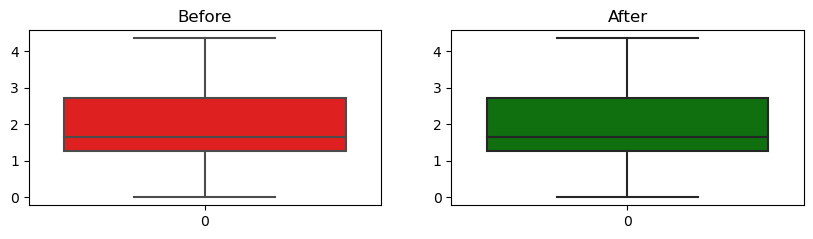

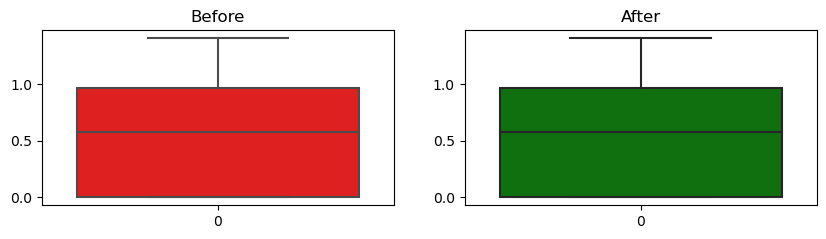

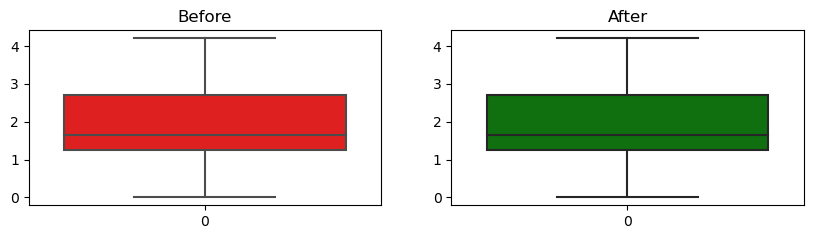

In [87]:
for col in df_num_b:
    plt.figure(figsize=(10,5))
    
    plt.subplot(221)
    sns.boxplot(df_num_b[col], color='r')
    plt.title('Before')
    
    plt.subplot(222)
    sns.boxplot(df_cap[col], color='g')
    plt.title('After')
    
    plt.show()    

In [88]:
# Now, we can observe that all outliers have been handled

## Working with Categorical Data

In [89]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [90]:
for i in df_cat:
    print('Feature ',i,'= ',df_cat[i].unique())

Feature  Attrition =  ['Yes' 'No']
Feature  BusinessTravel =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Feature  Department =  ['Sales' 'Research & Development' 'Human Resources']
Feature  EducationField =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Feature  Gender =  ['Female' 'Male']
Feature  JobRole =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Feature  MaritalStatus =  ['Single' 'Married' 'Divorced']
Feature  Over18 =  ['Y']
Feature  OverTime =  ['Yes' 'No']


In [91]:
df_cat.isnull().sum()

Attrition         0
BusinessTravel    0
Department        0
EducationField    0
Gender            0
JobRole           0
MaritalStatus     0
Over18            0
OverTime          0
dtype: int64

In [92]:
len(df_cat.columns)

9

In [93]:
# we can drop over18 column as it has only one unique variable
df_cat = df_cat.drop(['Over18'],axis = 1)
df_cat.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

### converting categorical to numerical

In [94]:
# for BusinessTravel , Department , EducationField, Gender,JobRole, MaritalStatus, OverTime will go with map method
# Attrition is dependent(target) we need to use label encoding 

#### Using map method to convert from categorical data to numerical data

In [95]:
df_cat['BusinessTravel'] = df_cat['BusinessTravel'].map({'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2}) 
df_cat['Department'] = df_cat['Department'].map({'Sales':0, 'Research & Development':1, 'Human Resources':2})
df_cat['EducationField'] = df_cat['EducationField'].map({'Life Sciences':0, 'Other':1, 'Medical':2, 'Marketing':3, 
'Technical Degree':4,'Human Resources':5})
df_cat['Gender'] = df_cat['Gender'].map({'Male':1, 'Female':0})
df_cat['JobRole'] = df_cat['JobRole'].map({'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2,
'Manufacturing Director':3, 'Healthcare Representative':4, 'Manager':5,'Sales Representative':6, 
'Research Director':7, 'Human Resources':8})
df_cat['MaritalStatus'] = df_cat['MaritalStatus'].map({'Single':0, 'Married':1, 'Divorced':2})
df_cat['OverTime'] = df_cat['OverTime'].map({'Yes':1, 'No':0})
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,0,0,0,0,0,0,1
1,No,1,1,0,1,1,1,0
2,Yes,0,1,1,1,2,0,1
3,No,1,1,0,0,1,1,1
4,No,0,1,2,1,2,1,0


#### Using Label encoding method for dependednt data only to convert from cat to num data

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
l1 = le.fit_transform(df_cat['Attrition'])
#q1 = q1.toarray()
l1 = pd.DataFrame(l1,index=df_cat.index)
l1.columns = ['Attrition_le']
df_cat = pd.concat([df_cat,l1],axis = 1)
df_cat = df_cat.drop(['Attrition'],axis = 1)
df_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition_le
0,0,0,0,0,0,0,1,1
1,1,1,0,1,1,1,0,0
2,0,1,1,1,2,0,1,1
3,1,1,0,0,1,1,1,0
4,0,1,2,1,2,1,0,0


In [97]:
# all categorical data is converted to numerical data

In [98]:
df_final = pd.concat([df_cap , df_cat], axis = 1)
df_final.head()

,Age_yoe,DailyRate_yoe,DistanceFromHome_yoe,Education_yoe,EmployeeNumber_yoe,EnvironmentSatisfaction_yoe,HourlyRate_yoe,JobInvolvement_yoe,JobLevel_yoe,JobSatisfaction_yoe,...,YearsSinceLastPromotion_yoe,YearsWithCurrManager_yoe,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition_le
0,5.805200,243.894616,0.698341,2.500954,0.889472,2.532175,48.291953,6.106201,0.744868,5.871944,...,-0.000000,2.250282,0,0,0,0,0,0,1,1
1,6.210510,87.208398,2.249981,1.141464,1.645618,4.091127,33.804302,3.426599,0.744868,2.553077,...,0.574592,2.712942,1,1,0,1,1,1,0,0
2,5.579486,287.376666,1.111697,2.500954,2.956131,5.796107,47.444744,3.426599,0.538819,4.135753,...,-0.000000,0.000000,0,1,1,1,2,0,1,1
3,5.334419,290.337785,1.407173,5.683554,3.547949,5.796107,31.494860,6.106201,0.538819,4.135753,...,0.964529,0.000000,1,1,0,0,1,1,1,0
4,4.920774,153.108179,1.111697,1.141464,4.647749,1.149818,23.821108,6.106201,0.538819,2.553077,...,0.820785,1.260936,0,1,2,1,2,1,0,0


### Splitting data into train and test

In [99]:
df_final.columns

Index(['Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
       'EmployeeNumber_yoe', 'EnvironmentSatisfaction_yoe', 'HourlyRate_yoe',
       'JobInvolvement_yoe', 'JobLevel_yoe', 'JobSatisfaction_yoe',
       'MonthlyIncome_yoe', 'MonthlyRate_yoe', 'NumCompaniesWorked_yoe',
       'PercentSalaryHike_yoe', 'RelationshipSatisfaction_yoe',
       'StockOptionLevel_yoe', 'TotalWorkingYears_yoe',
       'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe',
       'YearsAtCompany_yoe', 'YearsInCurrentRole_yoe',
       'YearsSinceLastPromotion_yoe', 'YearsWithCurrManager_yoe',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Attrition_le'],
      dtype='object')

In [100]:
# Split the data

# Give independent data to x & dependent data to y
x = df_final.drop(['Attrition_le'],axis=1)                 # independent 
y = df_final['Attrition_le']                               # dependent

In [101]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split

In [102]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=11)
# test_size indicates percentage of values for test i.e, 10% Data = Test & 90% Data = Train

In [103]:
len(x_train) , len(y_train)                   # 80% Random Data selected for train

(1323, 1323)

In [104]:
len(x_test) , len(y_test)                     # 20% Random Data selected for test

(147, 147)

## 2.5 Feature Scaling

#### Scaling Down the values so that we can get proper features for the model

In [105]:
x_train.columns

Index(['Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
       'EmployeeNumber_yoe', 'EnvironmentSatisfaction_yoe', 'HourlyRate_yoe',
       'JobInvolvement_yoe', 'JobLevel_yoe', 'JobSatisfaction_yoe',
       'MonthlyIncome_yoe', 'MonthlyRate_yoe', 'NumCompaniesWorked_yoe',
       'PercentSalaryHike_yoe', 'RelationshipSatisfaction_yoe',
       'StockOptionLevel_yoe', 'TotalWorkingYears_yoe',
       'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe',
       'YearsAtCompany_yoe', 'YearsInCurrentRole_yoe',
       'YearsSinceLastPromotion_yoe', 'YearsWithCurrManager_yoe',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [106]:
y_train

1226    0
1448    0
1152    0
844     0
216     1
       ..
332     0
1293    0
1361    0
1115    0
1104    0
Name: Attrition_le, Length: 1323, dtype: int32

In [107]:
#  Scaling down using z_score = xi - mean / std

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_1 = sc.fit_transform(x_train)
x_test_1 = sc.transform(x_test)

In [109]:
x_train_1 = pd.DataFrame(x_train_1,columns=x_train.columns)
x_test_1 = pd.DataFrame(x_test_1,columns=x_test.columns)

In [110]:
# After scaling checking the box plot once again whether distribution has change or not

In [111]:
len(x_train_1.columns)

30

In [112]:
x_train_1.columns

Index(['Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
       'EmployeeNumber_yoe', 'EnvironmentSatisfaction_yoe', 'HourlyRate_yoe',
       'JobInvolvement_yoe', 'JobLevel_yoe', 'JobSatisfaction_yoe',
       'MonthlyIncome_yoe', 'MonthlyRate_yoe', 'NumCompaniesWorked_yoe',
       'PercentSalaryHike_yoe', 'RelationshipSatisfaction_yoe',
       'StockOptionLevel_yoe', 'TotalWorkingYears_yoe',
       'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe',
       'YearsAtCompany_yoe', 'YearsInCurrentRole_yoe',
       'YearsSinceLastPromotion_yoe', 'YearsWithCurrManager_yoe',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

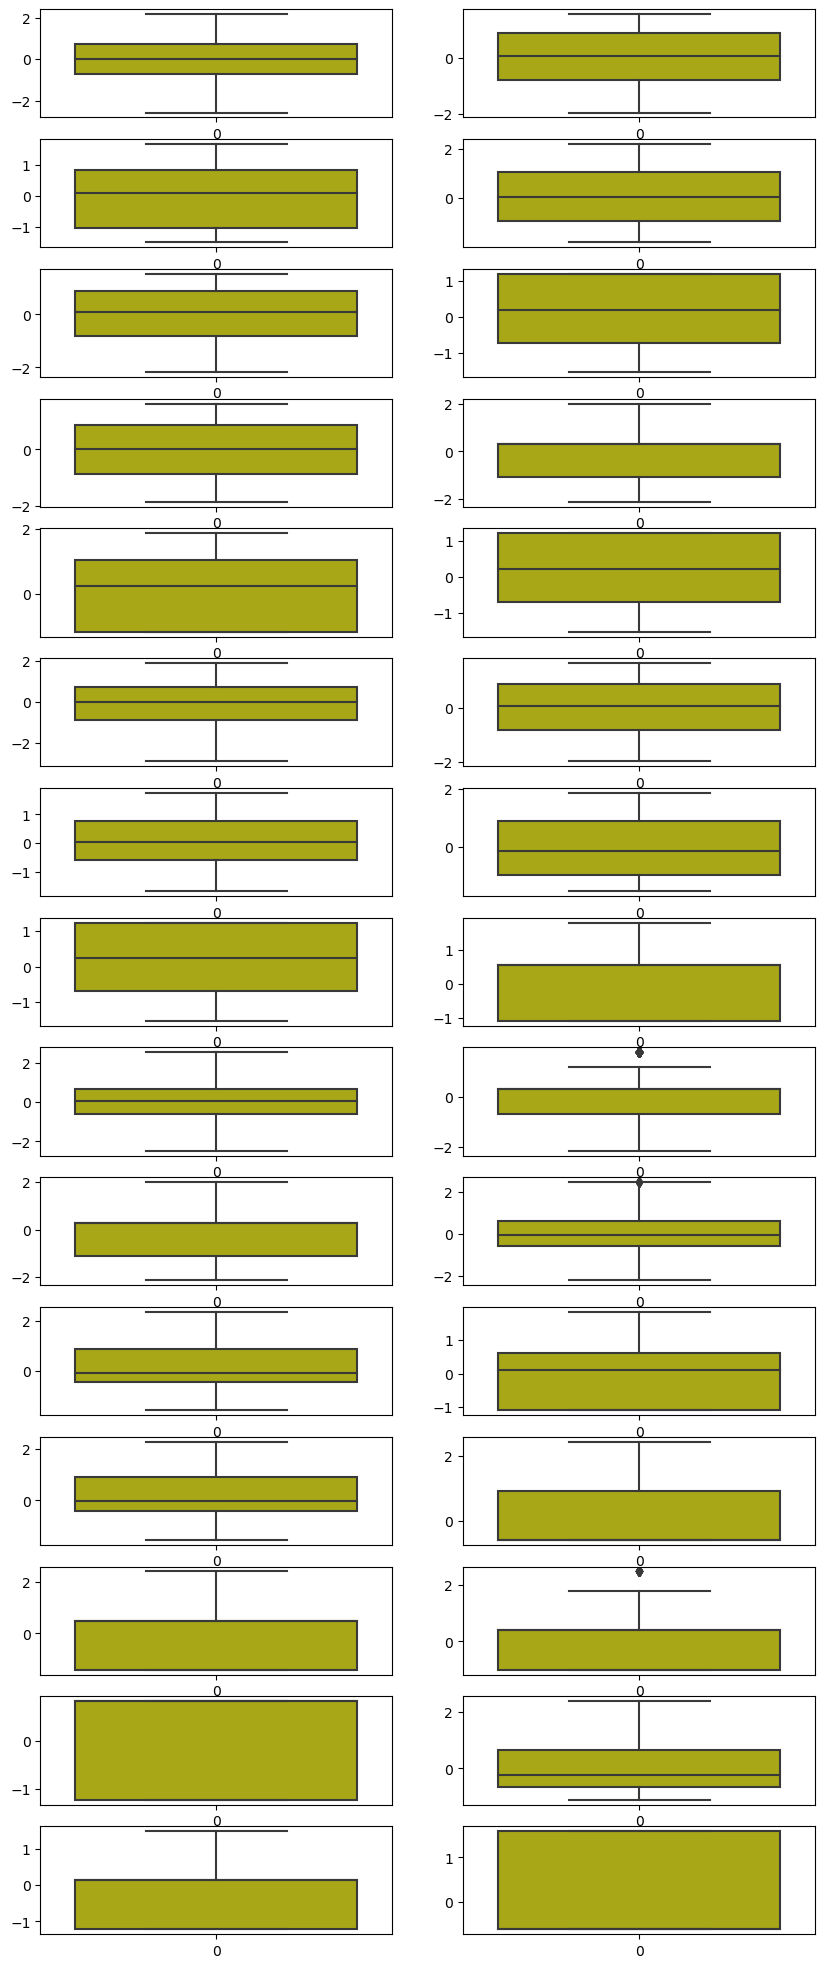

In [113]:
sf = x_train_1.columns

fig , ax = plt.subplots(15 , 2 , figsize=(10,25))
for i,subplot in zip(sf,ax.flatten()):
    sns.boxplot(x_train_1[i],ax=subplot,color = 'y')

## 2.6 Feature Selection

#### Using Corelation will find best feature s in the dataset

In [114]:
!pip install feature_engine

In [115]:
from feature_engine.selection import DropCorrelatedFeatures
cor = DropCorrelatedFeatures(threshold=0.85,method='pearson')
cor.fit(x_train_1)

DropCorrelatedFeatures(threshold=0.85)

In [116]:
cor.features_to_drop_

{'MonthlyIncome_yoe'}

In [117]:
cor.correlated_feature_sets_

[{'JobLevel_yoe', 'MonthlyIncome_yoe'}]

#### Checking with Hypothesis Testing for numerical column

In [118]:
from scipy.stats import pearsonr
corr = []
h = ['Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
       'EmployeeNumber_yoe', 'EnvironmentSatisfaction_yoe', 'HourlyRate_yoe',
       'JobInvolvement_yoe', 'JobLevel_yoe', 'JobSatisfaction_yoe',
       'MonthlyIncome_yoe', 'MonthlyRate_yoe', 'NumCompaniesWorked_yoe',
       'PercentSalaryHike_yoe', 'RelationshipSatisfaction_yoe',
       'StockOptionLevel_yoe', 'TotalWorkingYears_yoe',
       'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe',
       'YearsAtCompany_yoe', 'YearsInCurrentRole_yoe',
       'YearsSinceLastPromotion_yoe', 'YearsWithCurrManager_yoe']

for i in h:
    sol = pearsonr(x_train_1[i] , y_train)
    corr.append(sol)
corr = np.array(corr)
print(corr)

[[-1.66811400e-01  1.03106306e-09]
 [-5.96117085e-02  3.01480800e-02]
 [ 8.96584008e-02  1.09601291e-03]
 [-3.34568035e-02  2.23940460e-01]
 [ 5.41548451e-03  8.43989503e-01]
 [-9.05182076e-02  9.80437439e-04]
 [-9.97045031e-03  7.17111369e-01]
 [-1.15641389e-01  2.48223575e-05]
 [-1.83715791e-01  1.65767435e-11]
 [-9.71276144e-02  4.03387981e-04]
 [-1.91658604e-01  2.06698233e-12]
 [ 2.16887030e-02  4.30561201e-01]
 [ 3.94798491e-02  1.51228583e-01]
 [-1.18117050e-02  6.67750898e-01]
 [-4.01552954e-02  1.44350702e-01]
 [-1.56228385e-01  1.11496753e-08]
 [-2.09235383e-01  1.48759175e-14]
 [-5.66514803e-02  3.93703402e-02]
 [-4.73519209e-02  8.51288868e-02]
 [-1.86425471e-01  8.23169317e-12]
 [-1.69844456e-01  5.06275057e-10]
 [-3.89659530e-02  1.56626388e-01]
 [-1.76794160e-01  9.44734461e-11]]


<Axes: >

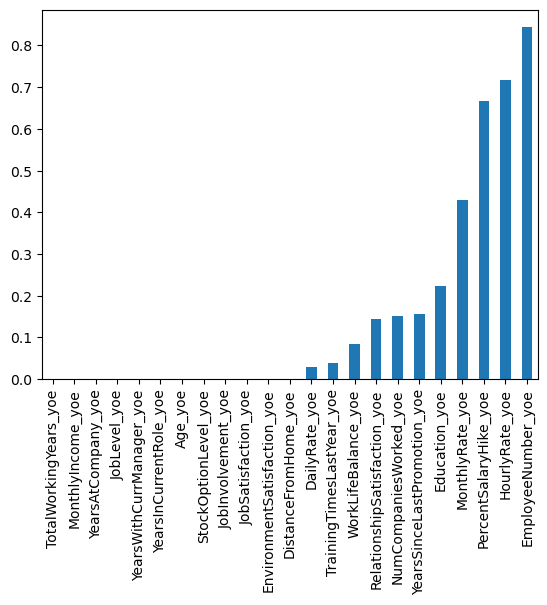

In [119]:
p_value_num = pd.Series(corr[: , 1],index=['Age_yoe', 'DailyRate_yoe', 'DistanceFromHome_yoe', 'Education_yoe',
       'EmployeeNumber_yoe', 'EnvironmentSatisfaction_yoe', 'HourlyRate_yoe',
       'JobInvolvement_yoe', 'JobLevel_yoe', 'JobSatisfaction_yoe',
       'MonthlyIncome_yoe', 'MonthlyRate_yoe', 'NumCompaniesWorked_yoe',
       'PercentSalaryHike_yoe', 'RelationshipSatisfaction_yoe',
       'StockOptionLevel_yoe', 'TotalWorkingYears_yoe',
       'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe',
       'YearsAtCompany_yoe', 'YearsInCurrentRole_yoe',
       'YearsSinceLastPromotion_yoe', 'YearsWithCurrManager_yoe'])

p_value_num = p_value_num.sort_values(ascending=True)
p_value_num.plot.bar()

In [120]:
# removing 'DailyRate_yoe', 'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe', 'RelationshipSatisfaction_yoe',
#'NumCompaniesWorked_yoe','YearsSinceLastPromotion_yoe', 'Education_yoe', 'MonthlyRate_yoe', 'PercentSalaryHike_yoe', 
#'HourlyRate_yoe','EmployeeNumber_yoe',  colum from train and test

In [121]:
x_train_1 = x_train_1.drop(['DailyRate_yoe', 'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe', 'RelationshipSatisfaction_yoe',
'NumCompaniesWorked_yoe','YearsSinceLastPromotion_yoe', 'Education_yoe', 'MonthlyRate_yoe', 'PercentSalaryHike_yoe', 
'HourlyRate_yoe','EmployeeNumber_yoe'], axis = 1)
x_test_1 = x_test_1.drop(['DailyRate_yoe', 'TrainingTimesLastYear_yoe', 'WorkLifeBalance_yoe', 'RelationshipSatisfaction_yoe',
'NumCompaniesWorked_yoe','YearsSinceLastPromotion_yoe', 'Education_yoe', 'MonthlyRate_yoe', 'PercentSalaryHike_yoe', 
'HourlyRate_yoe','EmployeeNumber_yoe'], axis = 1)

In [122]:
x_train_1.columns

Index(['Age_yoe', 'DistanceFromHome_yoe', 'EnvironmentSatisfaction_yoe',
       'JobInvolvement_yoe', 'JobLevel_yoe', 'JobSatisfaction_yoe',
       'MonthlyIncome_yoe', 'StockOptionLevel_yoe', 'TotalWorkingYears_yoe',
       'YearsAtCompany_yoe', 'YearsInCurrentRole_yoe',
       'YearsWithCurrManager_yoe', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

#### Now for categorical col using chi2 test

In [123]:
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Attrition_le'],
      dtype='object')

In [124]:
chi = x_train_1[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime']]
chi.head()


# Not going with chi2 because of negative values 

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.919618,0.492867,-1.015412,0.814955,-0.669985,0.136307,-0.626603
1,-0.591754,-1.408191,-1.015412,0.814955,-1.103004,1.492200,-0.626603
2,-0.591754,0.492867,0.386874,0.814955,-0.669985,-1.219586,-0.626603
3,-0.591754,-1.408191,1.088017,0.814955,-1.103004,0.136307,-0.626603
4,0.919618,-1.408191,1.088017,-1.227062,-1.103004,-1.219586,-0.626603


## [3] Checking Data is balanced or not

#### Train Data

In [125]:
## checking whether the data is balanced or not 

print('The value 1 in dependent variable = ',sum(y_train == 1))
print('The value 1 in dependent variable = ',sum(y_train == 0))

#for maintain data balacned we are using upsampling 
# !pip install imblearn 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

x_train_res , y_train_res = sm.fit_resample(x_train_1 , y_train)
print('')

print('The value 1 in dependent variable after balancing = ',sum(y_train_res == 1))
print('The value 1 in dependent variable after balancing = ',sum(y_train_res == 0))

The value 1 in dependent variable =  211
The value 1 in dependent variable =  1112

The value 1 in dependent variable after balancing =  1112
The value 1 in dependent variable after balancing =  1112


#### Test Data

In [126]:
print('The value 1 in dependent variable = ',sum(y_test == 1))
print('The value 1 in dependent variable = ',sum(y_test == 0))

#for maintain data balacned we are using upsampling 
# !pip install imblearn 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)

x_test_res , y_test_res = sm.fit_resample(x_test_1 , y_test)
print('')

print('The value 1 in dependent variable after balancing = ',sum(y_test_res == 1))
print('The value 1 in dependent variable after balancing = ',sum(y_test_res == 0))

The value 1 in dependent variable =  26
The value 1 in dependent variable =  121

The value 1 in dependent variable after balancing =  121
The value 1 in dependent variable after balancing =  121


In [127]:
# Now, data is balanced so we can develop the model

## [4] Model Development

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [129]:
def knn(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg = KNeighborsClassifier(n_neighbors=5)
    reg.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg.score(x_test_res,y_test_res))

    y_test_pred = reg.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

In [130]:
def lg(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg1 = LogisticRegression()
    reg1.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg1.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg1.score(x_test_res,y_test_res))

    y_test_pred = reg1.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

In [131]:
def NB(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg2 = GaussianNB()
    reg2.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg2.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg2.score(x_test_res,y_test_res))
    
    y_test_pred = reg2.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

In [132]:
def DT(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg3 = DecisionTreeClassifier(criterion='entropy')
    reg3.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg3.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg3.score(x_test_res,y_test_res))

    y_test_pred = reg3.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

In [133]:
def RF(x_train_res, y_train_res ,x_test_res,y_test_res):
    reg4 = RandomForestClassifier()
    reg4.fit(x_train_res , y_train_res)
    print('Training accuracy = ',reg4.score(x_train_res,y_train_res))
    print('Test accuracy = ',reg4.score(x_test_res,y_test_res))

    y_test_pred = reg4.predict(x_test_res)
    print('Test data confusion_matrix : ',confusion_matrix(y_test_res,y_test_pred))
    print('Test data classification_report : ',classification_report(y_test_res,y_test_pred))

In [134]:
def all_algorithms(x_train_res, y_train_res ,x_test_res,y_test_res):
    print('------------*------KNN-----*-----------')
    knn(x_train_res, y_train_res ,x_test_res,y_test_res)
    print('------------*------Logistic Regression-----*-----------')
    lg(x_train_res, y_train_res ,x_test_res,y_test_res)
    print('------------*------Naive Bayes-----*-----------')
    NB(x_train_res, y_train_res ,x_test_res,y_test_res)
    print('------------*------Decision Tree-----*-----------')
    DT(x_train_res, y_train_res ,x_test_res,y_test_res)
    print('------------*------Random Forest-----*-----------')
    RF(x_train_res, y_train_res ,x_test_res,y_test_res)

In [135]:
all_algorithms(x_train_res, y_train_res ,x_test_res,y_test_res)

------------*------KNN-----*-----------
Training accuracy =  0.9001798561151079
Test accuracy =  0.6363636363636364
Test data confusion_matrix :  [[88 33]
 [55 66]]
Test data classification_report :                precision    recall  f1-score   support

           0       0.62      0.73      0.67       121
           1       0.67      0.55      0.60       121

    accuracy                           0.64       242
   macro avg       0.64      0.64      0.63       242
weighted avg       0.64      0.64      0.63       242

------------*------Logistic Regression-----*-----------
Training accuracy =  0.7697841726618705
Test accuracy =  0.743801652892562
Test data confusion_matrix :  [[91 30]
 [32 89]]
Test data classification_report :                precision    recall  f1-score   support

           0       0.74      0.75      0.75       121
           1       0.75      0.74      0.74       121

    accuracy                           0.74       242
   macro avg       0.74      0.74      0

In [136]:
# As we can see above, Among 5 algorithms, Random Forest has better accuracy for both Training and Testing  
# But, we need to check it using AUC & ROC

## [5] Selecting Best Model using AUC(Area under the curve) & ROC(Rectifier operating Characteristics)

In [137]:
r1 = KNeighborsClassifier()
r1.fit(x_train_res , y_train_res)
y_k = r1.predict_proba(x_test_res)[:,1]

In [139]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = roc_curve(y_test_res, y_k)

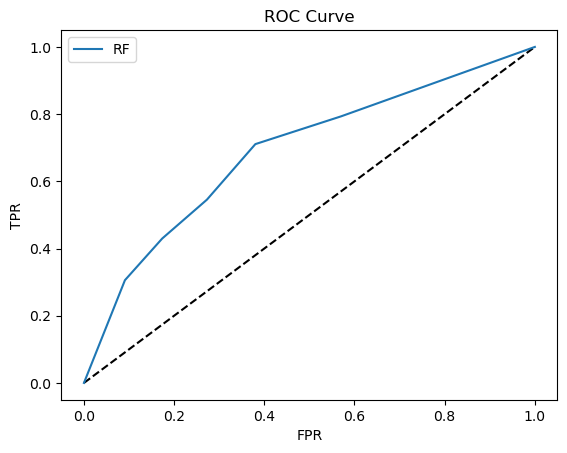

In [140]:
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label = "RF")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend(loc = 0)
plt.show()

### Plotting AUC & ROC for all models

In [141]:
# Model importing 
r1 = KNeighborsClassifier()
r2 = LogisticRegression()
r3 = GaussianNB()
r4 = DecisionTreeClassifier()
r5 = RandomForestClassifier()

# Model training 
r1.fit(x_train_res , y_train_res)
r2.fit(x_train_res , y_train_res)
r3.fit(x_train_res , y_train_res)
r4.fit(x_train_res , y_train_res)
r5.fit(x_train_res , y_train_res)


# Model testing 
y_K = r1.predict_proba(x_test_res)[:,1]
y_L = r2.predict_proba(x_test_res)[:,1]
y_N = r3.predict_proba(x_test_res)[:,1]
y_D = r4.predict_proba(x_test_res)[:,1]
y_R = r5.predict_proba(x_test_res)[:,1]


# finding FPR and TPR for all models 

fprk, tprk, threshold = roc_curve(y_test_res, y_K)  #KNN
fprL, tprL, threshold = roc_curve(y_test_res, y_L)  # LR
fprN, tprN, threshold = roc_curve(y_test_res, y_N)  # NB
fprD, tprD, threshold = roc_curve(y_test_res, y_D)  # DT
fprR, tprR, threshold = roc_curve(y_test_res, y_R) # RF

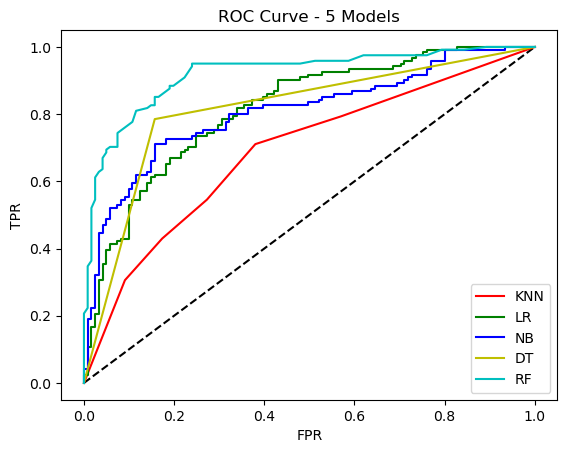

In [142]:
plt.plot([0, 1], [0, 1], "k--")

plt.plot(fprk, tprk, label = "KNN",color = 'r')
plt.plot(fprL, tprL, label = "LR",color = 'g')
plt.plot(fprN, tprN, label = "NB" , color = 'b')
plt.plot(fprD, tprD, label = "DT",color = 'y')
plt.plot(fprR, tprR, label = "RF" , color = 'c')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - 5 Models")
plt.legend(loc = 0)
plt.show()

In [143]:
# Since Light Blue line is high its belongs to Random Forest
# It's the best model

### Prediction with test data

In [144]:
len(x_test_res.columns)

19

In [145]:
x_test_res

,Age_yoe,DistanceFromHome_yoe,EnvironmentSatisfaction_yoe,JobInvolvement_yoe,JobLevel_yoe,JobSatisfaction_yoe,MonthlyIncome_yoe,StockOptionLevel_yoe,TotalWorkingYears_yoe,YearsAtCompany_yoe,YearsInCurrentRole_yoe,YearsWithCurrManager_yoe,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,-1.420270,-0.712955,-1.532736,0.322180,-1.151480,-1.509134,-0.305793,0.556818,-0.591504,-0.941374,-0.442217,-0.395609,-0.591754,0.492867,0.386874,0.814955,-0.236966,0.136307,-0.626603
1,-0.997603,0.356297,1.198656,0.322180,-1.151480,1.198626,-1.454016,0.556818,-0.793731,-0.055673,-0.442217,0.252505,-0.591754,0.492867,0.386874,0.814955,-0.669985,0.136307,-0.626603
2,-0.607758,-0.712955,0.196357,0.322180,-1.151480,-1.509134,-0.759067,0.556818,-1.021340,-0.294913,-0.442217,-0.040625,2.430989,0.492867,0.386874,0.814955,-0.669985,1.492200,1.595906
3,0.712964,-0.712955,0.196357,-2.130887,1.870099,1.198626,1.878385,0.556818,1.558784,0.493044,0.888611,0.925009,-0.591754,0.492867,-1.015412,0.814955,1.928129,0.136307,-0.626603
4,-1.569611,1.053386,1.198656,-1.066190,0.264019,0.201885,-0.174408,1.321209,-0.793731,-0.294913,-0.442217,-0.395609,-0.591754,0.492867,0.386874,-1.227062,0.196053,1.492200,-0.626603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-1.270292,-0.246795,0.205715,-1.053228,-1.151480,0.185910,-1.209213,0.541543,-0.241440,0.487921,0.876186,0.918730,0.905507,0.492867,0.399966,-1.227062,-0.669985,0.123648,1.595906
238,-1.765927,-0.006635,-0.240674,0.322180,-1.151480,-1.509134,-0.964333,-0.665723,-1.641719,-1.306818,-1.301584,-1.252581,-0.591754,0.492867,0.386874,-0.710939,-0.236966,0.136307,1.034164
239,1.635476,-1.083232,0.969491,0.205695,1.799972,-1.365579,1.820118,0.419552,1.430402,0.051220,-0.480947,0.308928,-0.591754,0.333367,0.269222,0.814955,0.880439,0.136307,1.409437
240,-0.685698,-0.637803,-0.720097,-0.532170,0.264019,-1.509134,0.521693,-0.072472,0.001898,0.252203,0.311713,0.417049,-0.591754,-1.408191,-0.476040,0.814955,-1.103004,0.657835,-0.626603


In [ ]:
# test data Index[2], Random Forest=r5

if r5.predict([[-0.607758,-0.712955,0.196357,0.322180,-1.151480,-1.509134,-0.759067,0.556818,-1.021340,-0.294913,-0.442217,-0.040625,2.430989,0.492867,0.386874,0.814955,-0.669985,1.492200,1.595906]]) == 1:
    print('Yes')
else:
    print('No')

In [ ]:
# test data Index[240], Random Forest=r5

if r5.predict([[-0.685698,-0.637803,-0.720097,-0.532170,0.264019,-1.509134,0.521693,-0.072472,0.001898,0.252203,0.311713,0.417049,-0.591754,-1.408191,-0.476040,0.814955,-1.103004,0.657835,-0.626603]]) == 1:
    print('Yes')
else:
    print('No')

### Save data

In [ ]:
import pickle
with open('Employee_Attrition.pkl','wb') as f:
    pickle.dump(r5, f)

In [ ]:
model = pickle.load(open('Employee_Attrition.pkl' , 'rb'))

In [ ]:
if model.predict([[-0.685698,-0.637803,-0.720097,-0.532170,0.264019,-1.509134,0.521693,-0.072472,0.001898,0.252203,0.311713,0.417049,-0.591754,-1.408191,-0.476040,0.814955,-1.103004,0.657835,-0.626603]])== 0:
    print('Yes')
else:
    print('No')

In [ ]:
if model.predict([[-0.685698,-0.637803,-0.720097,-0.532170,0.264019,-1.509134,0.521693,-0.072472,0.001898,0.252203,0.311713,0.417049,-0.591754,-1.408191,-0.476040,0.814955,-1.103004,0.657835,-0.626603]])== 0:
    print('Yes')
else:
    print('No')